# Diversity of Categories

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, product
import json

In [134]:
# show all columns of dataframes
#pd.set_option('display.max_columns', None)

## Loading data
Necessary data are the dataframe created in the basic_exploration and the race_codes. The race codes contain information about the code of the race and its corresponding description/title.

In [135]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'

In [136]:
data_df = pd.read_csv(data_path, sep=';')

In [137]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052248 entries, 0 to 4052247
Data columns (total 31 columns):
 #   Column          Dtype  
---  ------          -----  
 0   YEAR            int64  
 1   SERIAL          int64  
 2   CPSID           float64
 3   ASECFLAG        float64
 4   PERNUM          int64  
 5   ASECWT          float64
 6   AGE             int64  
 7   SEX             int64  
 8   RACE            int64  
 9   ASIAN           float64
 10  SPLOC           int64  
 11  SPRULE          int64  
 12  BPL             float64
 13  YRIMMIG         float64
 14  CITIZEN         float64
 15  MBPL            float64
 16  FBPL            float64
 17  NATIVITY        float64
 18  HISPAN          float64
 19  EMPSTAT         int64  
 20  OCC2010         float64
 21  OCCLY           float64
 22  OCC10LY         float64
 23  INCWAGE         int64  
 24  MIGSTA1         float64
 25  WHYMOVE         float64
 26  MIGRATE1        float64
 27  Category        object 
 28  occ_title   

In [138]:
race_codes_df = pd.read_csv(race_occ_path, sep=';')

## How diverse are the occupation categories in the year 2023?
Create a dataframe that only contains needed information. The occupation category instead of the exact occupation is used, because there are 423 different occupations available. Occupation categories are based on OCC2010. This column provides a more standardized representation of the occupation and occupation categories. Originally it was introduced to ensure comparability among several years.

In [139]:
data_df = data_df[data_df['YEAR'] == 2023]

In [140]:
data_df['OCC2010'].unique().size

423

In [141]:
race_occ_df = pd.DataFrame()
race_occ_df['RACE'] = data_df['RACE']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['ASECWT'] = data_df['ASECWT']

In [142]:
race_occ_df = pd.merge(race_occ_df, race_codes_df, on='RACE', how='left')

In [143]:
race_occ_df['occ_category'] = race_occ_df['occ_category'].astype('category')
race_occ_df['race_title'] = race_occ_df['race_title'].astype('category')

### Diversity of entire dataset
As expected the following shows, that some races are overrepresented in the entire dataset. This is why it is important to incorporate the weight into the analysis to properly represent the actual distribution of races in the U.S. <br>

The top 5 races based on weight are
* White 100
* Black 200
* Asian only 651
* American Indian/Aleut/Eskimo 300
* White-Black 801

In [144]:
race_weighed = race_occ_df.groupby(['RACE'])['ASECWT'].sum().reset_index()

In [145]:
race_counts = race_occ_df['RACE'].value_counts().rename_axis('RACE').reset_index(name='total_counts')

In [146]:
races = race_counts.merge(race_weighed, on='RACE')
races = pd.merge(races, race_codes_df, on='RACE', how='left')

In [147]:
races.sort_values(by=['ASECWT'], ascending=False)

RACE  total_counts        ASECWT  \
0    100         50859  1.179386e+08   
1    200          7316  1.960354e+07   
2    651          4950  1.076659e+07   
3    300           823  1.579602e+06   
6    801           364  1.017797e+06   
4    802           436  9.122458e+05   
7    803           316  7.292213e+05   
5    652           397  7.161629e+05   
10   805            63  1.353441e+05   
8    804            64  1.146162e+05   
12   810            43  1.058723e+05   
9    809            64  6.705849e+04   
13   806            17  4.654240e+04   
11   813            51  3.568107e+04   
17   807             7  2.464317e+04   
14   811            11  2.215132e+04   
18   812             7  1.727226e+04   
19   819             5  1.211105e+04   
16   808             8  1.120086e+04   
20   816             5  7.857150e+03   
15   830            10  7.402050e+03   
21   817             3  3.214120e+03   
22   815             3  2.932320e+03   
23   820             2  2.522390e+03   

                                           race_title  start   end  
0                                               White   1967  2023  
1                                               Black   1967  2023  
2                                          Asian only   2003  2023  
3                        American Indian/Aleut/Eskimo   1988  2023  
6                                         White-Black   2003  2023  
4                               White-American Indian   2003  2023  
7                                         White-Asian   2003  2023  
5                      Hawaiian/Pacific Islander only   2003  2023  
10                              Black-American Indian   2003  2023  
8                     White-Hawaiian/Pacific Islander   2003  2023  
12                        White-Black-American Indian   2003  2023  
9                     Asian-Hawaiian/Pacific Islander   2003  2023  
13                                        Black-Asian   2003  2023  
11              White-Asian-Hawaiian/Pacific Islander   2003  2023  
17                    Black-Hawaiian/Pacific Islander   2003  2023  
14                                  White-Black-Asian   2003  2023  
18                        White-American Indian-Asian   2003  2023  
19  White-American Indian-Asian-Hawaiian/Pacific I...   2013  2023  
16                              American Indian-Asian   2003  2023  
20             White-Black--Hawaiian/Pacific Islander   2013  2023  
15                    Four or five races, unspecified   2003  2023  
21    White-American Indian-Hawaiian/Pacific Islander   2013  2023  
22          American Indian-Hawaiian/Pacific Islander   2013  2023  
23                    Two or three races, unspecified   2003  2023

In [148]:
race_occ_df[race_occ_df['RACE'] == 100]['ASECWT'].sum()

117938641.67

### Nr of races per occupation category

Total numbers

In [149]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
diversity_df = []
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    diversity_df.append([occupation_category, len(pivot_df.columns)])

diversity_df = pd.DataFrame(diversity_df)
diversity_df.columns = ['occ_category', 'nr_races']
diversity_df.sort_values(by='nr_races', inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2254681230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2254681230.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):


In [150]:
diversity_df

occ_category  nr_races
8                                       EXTRACTION         5
9                   FARMING, FISHING, AND FORESTRY         8
18    NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)         8
24                                     TECHNICIANS         9
4                    COMMUNITY AND SOCIAL SERVICES        11
13                              HEALTHCARE SUPPORT        11
15                                           LEGAL        11
16              LIFE, PHYSICAL, AND SOCIAL SCIENCE        11
22                              PROTECTIVE SERVICE        12
20                       PERSONAL CARE AND SERVICE        13
10                           FINANCIAL SPECIALISTS        13
0                     ARCHITECTURE AND ENGINEERING        13
3                  BUSINESS OPERATIONS SPECIALISTS        14
5                        COMPUTER AND MATHEMATICAL        14
6                                     CONSTRUCTION        14
21                                      PRODUCTION        14
1   ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA        15
14           INSTALLATION, MAINTENANCE, AND REPAIR        15
23                               SALES AND RELATED        15
12          HEALTHCARE PRACTITIONERS AND TECHNICAL        17
11                    FOOD PREPARATION AND SERVING        17
7                 EDUCATION, TRAINING, AND LIBRARY        17
2    BUILDING AND GROUNDS CLEANING AND MAINTENANCE        17
25              TRANSPORTATION AND MATERIAL MOVING        17
17         MANAGEMENT, BUSINESS, SCIENCE, AND ARTS        19
19               OFFICE AND ADMINISTRATIVE SUPPORT        20

Sum of weights

In [151]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
diversity_df = []
for occupation_category, group_df in grouped_df.groupby('occ_category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='ASECWT').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    diversity_df.append([occupation_category, len(pivot_df.columns)])
diversity_df = pd.DataFrame(diversity_df)
diversity_df.columns = ['occ_category', 'nr_races']
diversity_df.sort_values(by='nr_races', inplace=True)

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2956925229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2956925229.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):


In [152]:
diversity_df

occ_category  nr_races
8                                       EXTRACTION         5
9                   FARMING, FISHING, AND FORESTRY         8
18    NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)         8
24                                     TECHNICIANS         9
4                    COMMUNITY AND SOCIAL SERVICES        11
13                              HEALTHCARE SUPPORT        11
15                                           LEGAL        11
16              LIFE, PHYSICAL, AND SOCIAL SCIENCE        11
22                              PROTECTIVE SERVICE        12
20                       PERSONAL CARE AND SERVICE        13
10                           FINANCIAL SPECIALISTS        13
0                     ARCHITECTURE AND ENGINEERING        13
3                  BUSINESS OPERATIONS SPECIALISTS        14
5                        COMPUTER AND MATHEMATICAL        14
6                                     CONSTRUCTION        14
21                                      PRODUCTION        14
1   ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA        15
14           INSTALLATION, MAINTENANCE, AND REPAIR        15
23                               SALES AND RELATED        15
12          HEALTHCARE PRACTITIONERS AND TECHNICAL        17
11                    FOOD PREPARATION AND SERVING        17
7                 EDUCATION, TRAINING, AND LIBRARY        17
2    BUILDING AND GROUNDS CLEANING AND MAINTENANCE        17
25              TRANSPORTATION AND MATERIAL MOVING        17
17         MANAGEMENT, BUSINESS, SCIENCE, AND ARTS        19
19               OFFICE AND ADMINISTRATIVE SUPPORT        20

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2011290666.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(diversity_df['occ_category'], rotation = 45, ha='right')


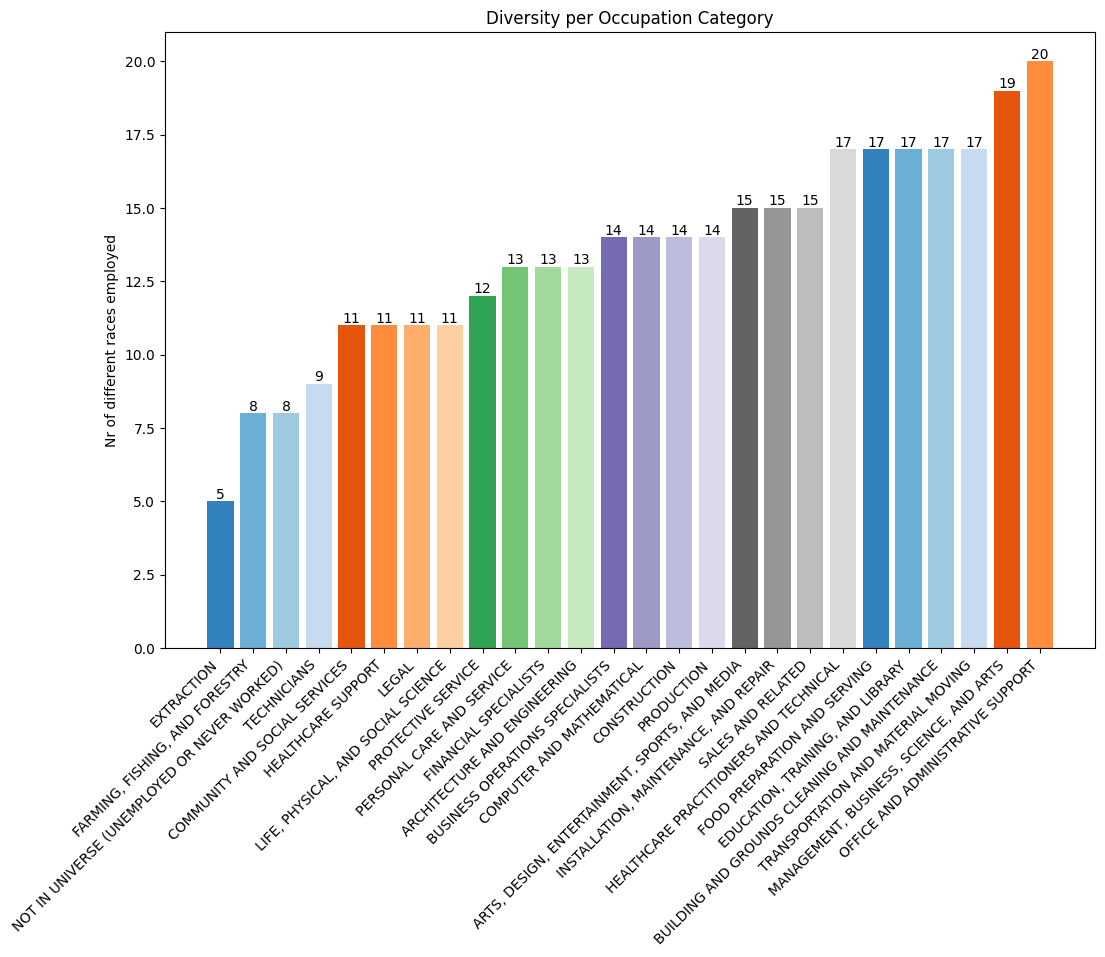

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(diversity_df['occ_category'], diversity_df['nr_races'], color=plt.cm.tab20c.colors
        )

ax.set_title('Diversity per Occupation Category', y = 1)
ax.set(ylabel='Nr of different races employed')
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticklabels(diversity_df['occ_category'], rotation = 45, ha='right')
plt.show()

### Plot
For each occupation category plot the amount of people per race working in that field. It can be observed that several categories are more diverse than others. 
* Art, Design, Entertainment Sports and Media is very diverse. But maybe this is because this cateory combines many subcategories.
* Extraction + military are least diverse. They both contain only few jobs (4 and 5)
* Food preperation and Serving + Healthcare are the most diverse categories.

In [154]:
def plot_occ_races(race_occ_df: pd.DataFrame, races: pd.DataFrame, percentage: bool = False, weighted: bool = False):
    """
    plot amount of people per race working in each occupation category
    """

    if weighted:
        grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
    else:
        grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')

    for occupation_category, group_df in grouped_df.groupby('occ_category'):
        # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
        if weighted:
            pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='ASECWT').fillna(0)
        else: 
            pivot_df = group_df.pivot(index='occ_category', columns='race_title', values='count').fillna(0)
        # only select those races which are present in the category
        pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

        pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

        array = pivot_df.to_numpy()
        array = array[0]
        titles = list(pivot_df.columns.str.strip())

        if percentage:
            current_title = 0
            relative_array = []
            for count in array:
                relative_array.append(100 / races[races['race_title'].str.strip() == titles[current_title]]['total_counts'].item() * count)
                current_title += 1

        cmap = plt.cm.tab20
        colors = cmap(np.arange(len(titles)) % cmap.N)

        fig, ax = plt.subplots()

        if percentage:
            bar_container = ax.bar(titles, relative_array, color = colors)
            ax.set(ylabel='Percentage of race', title=f'Percentage of people belonging to specific race working in {occupation_category}')
            ax.bar_label(bar_container, fmt=lambda x: f'{x:.2f}%')
        else:
            bar_container = ax.bar(titles, array, color = colors)
            ax.set(ylabel='count', title=f'{occupation_category}')
            ax.bar_label(bar_container, fmt='{:,.0f}')

        ax.set_xticklabels(titles, rotation = 45, ha='right')

        plt.show()

Absolute numbers

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titl

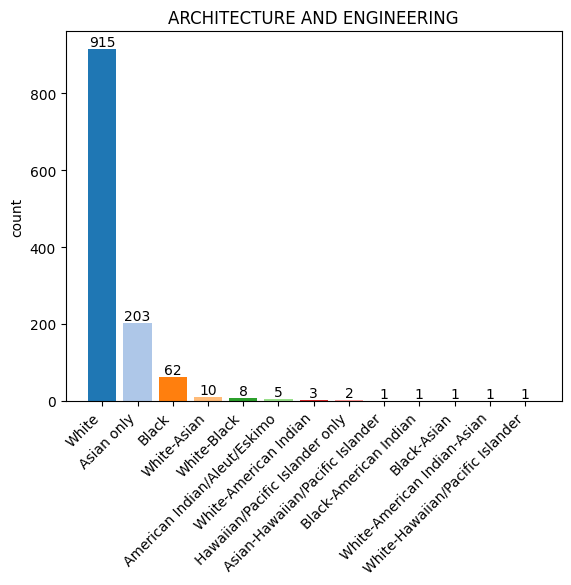

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


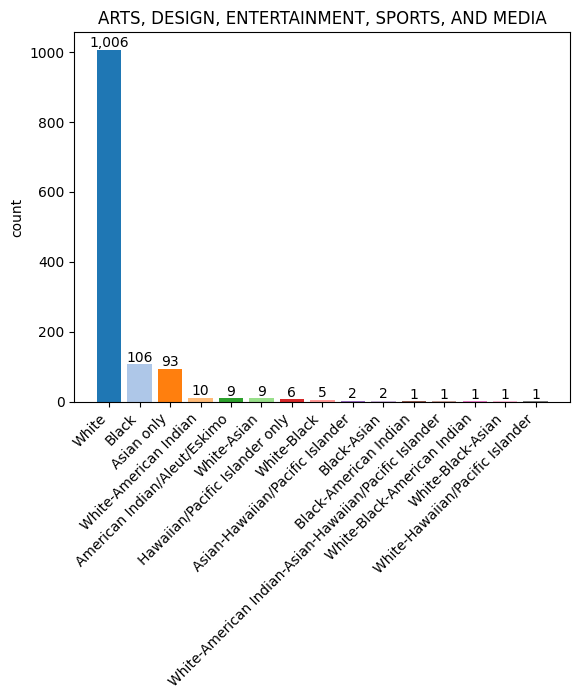

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


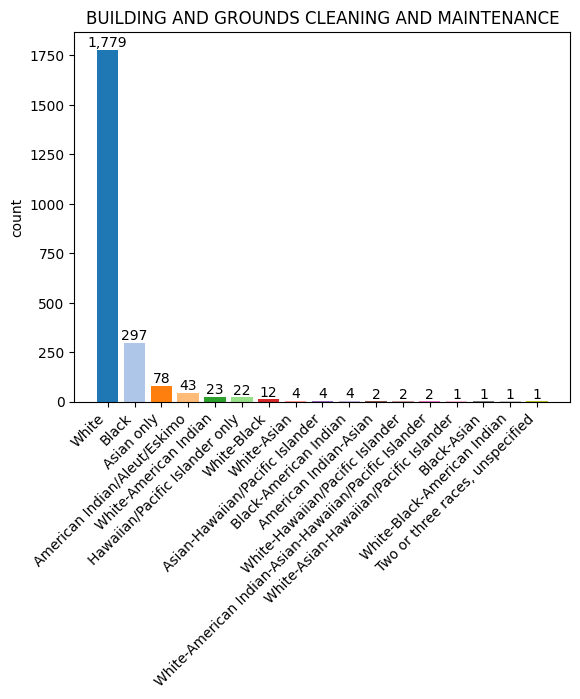

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


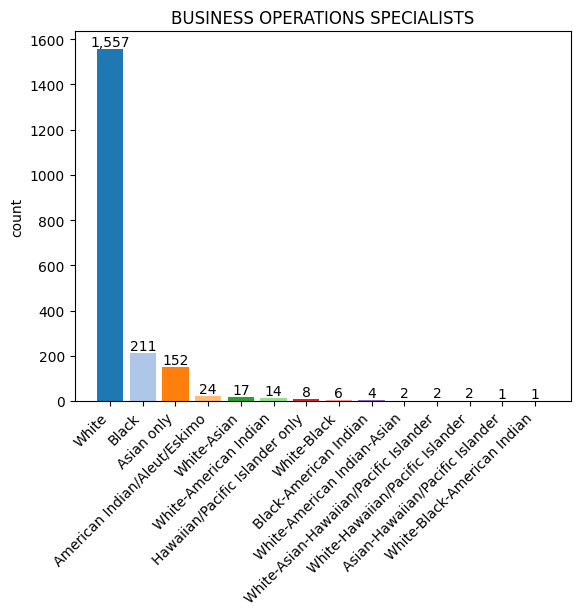

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


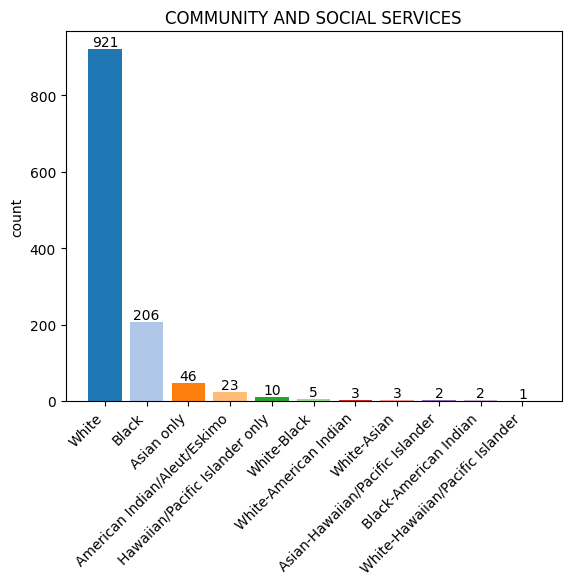

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


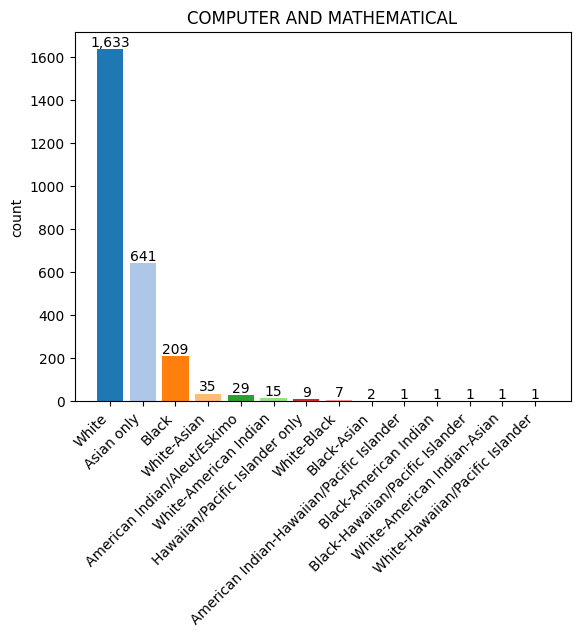

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


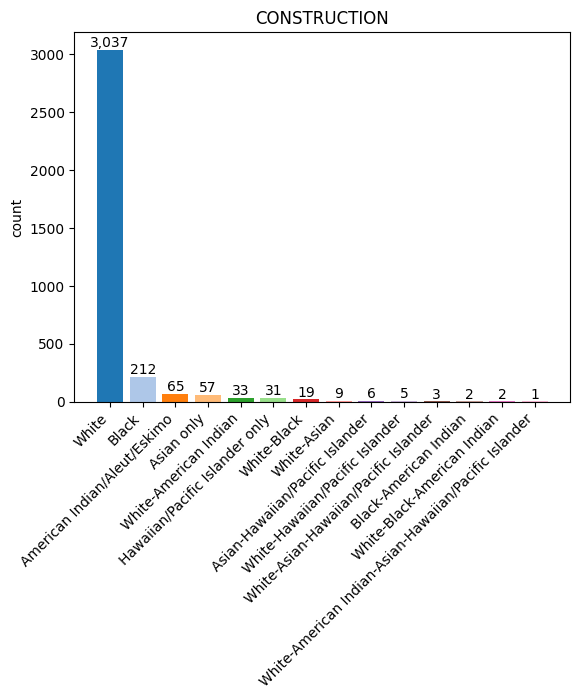

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


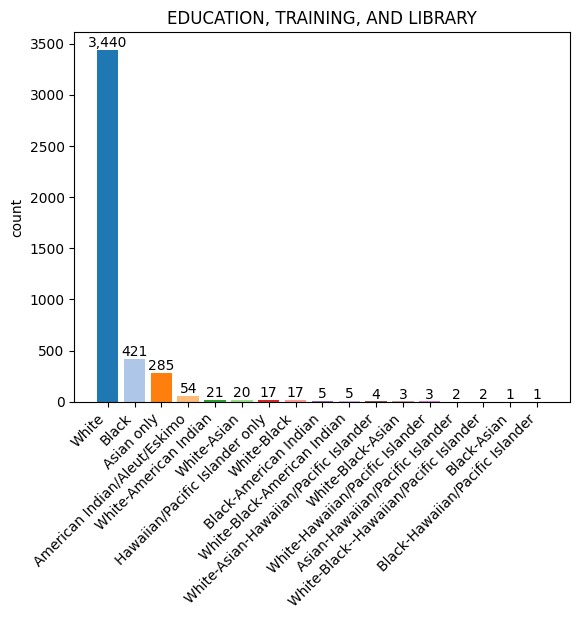

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


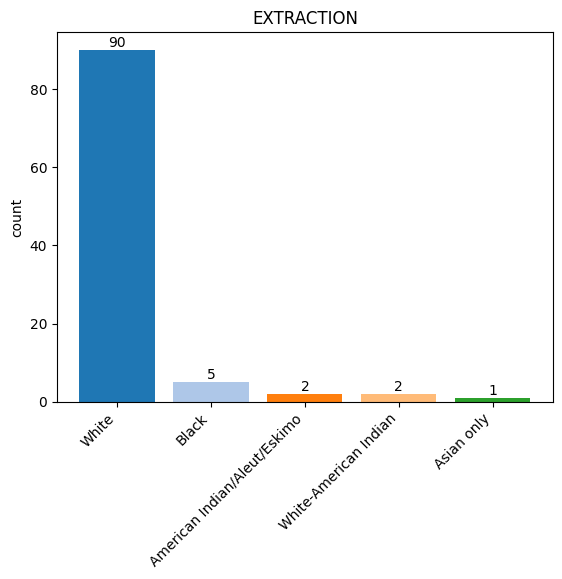

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


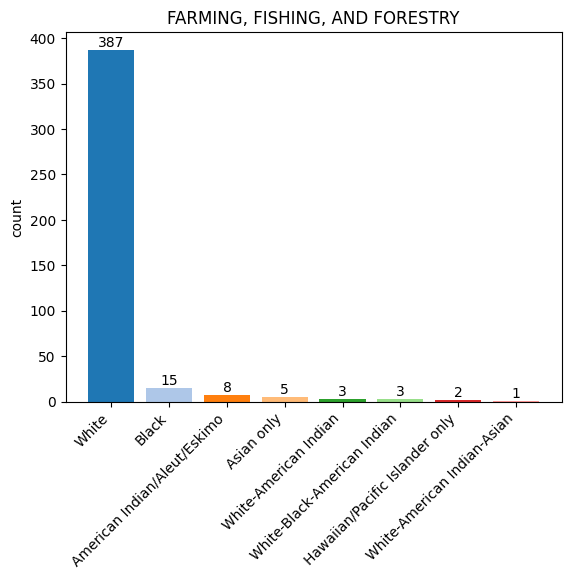

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


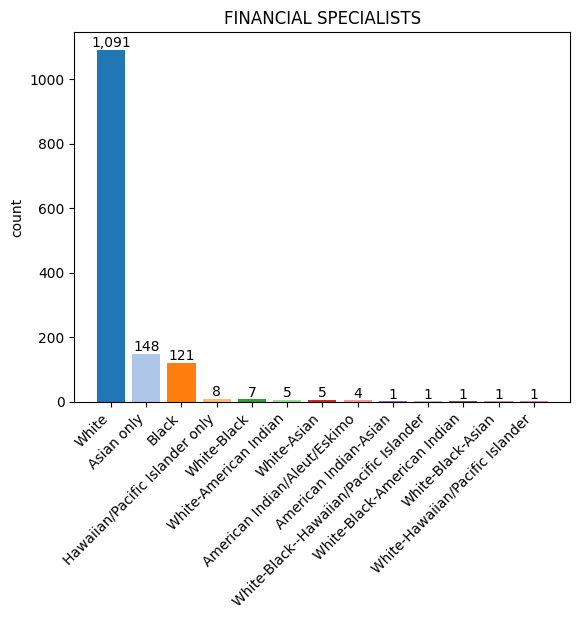

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


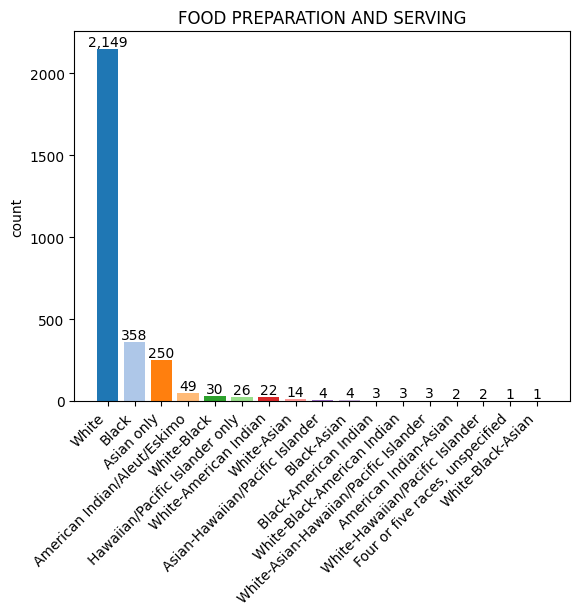

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


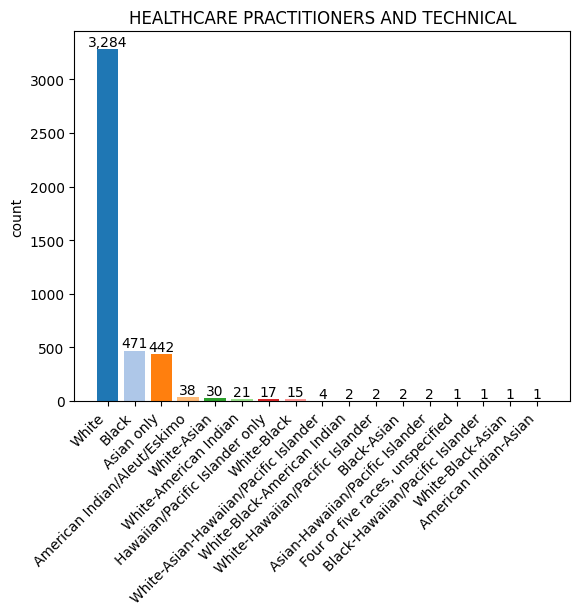

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


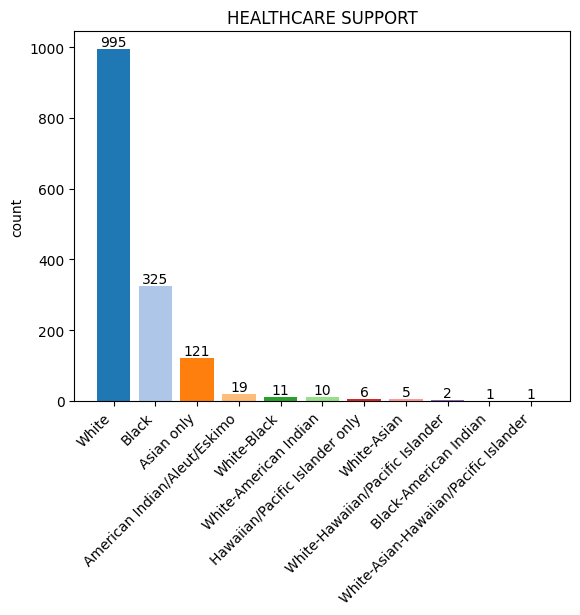

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


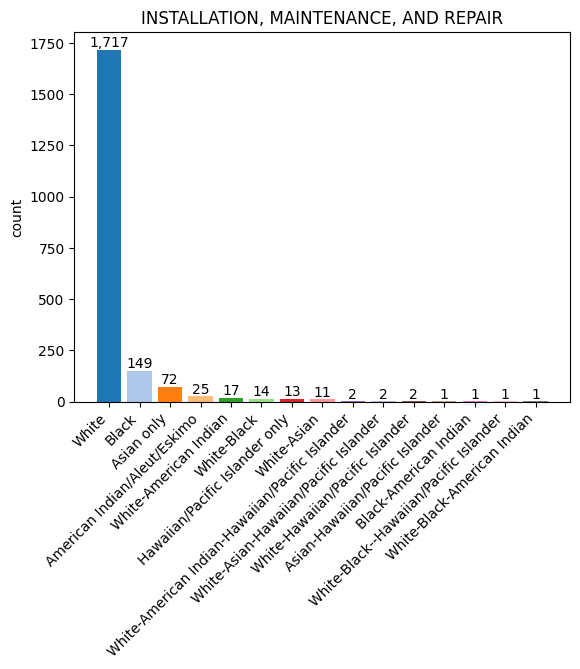

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


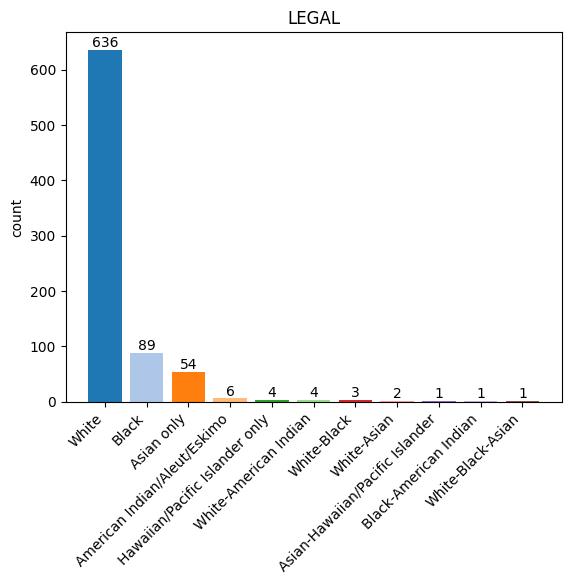

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


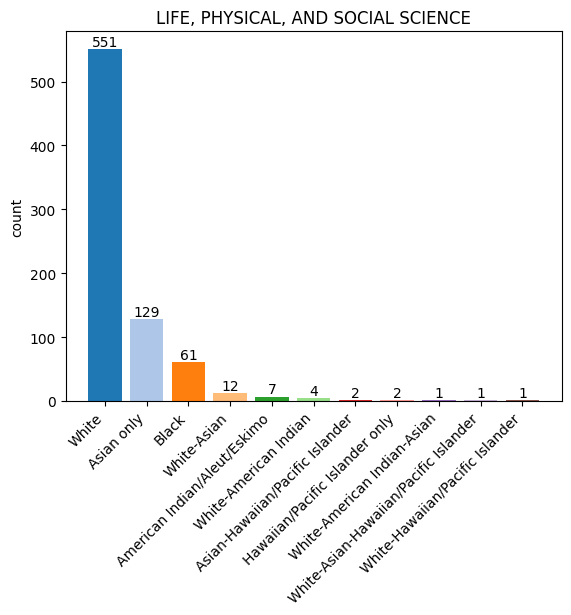

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


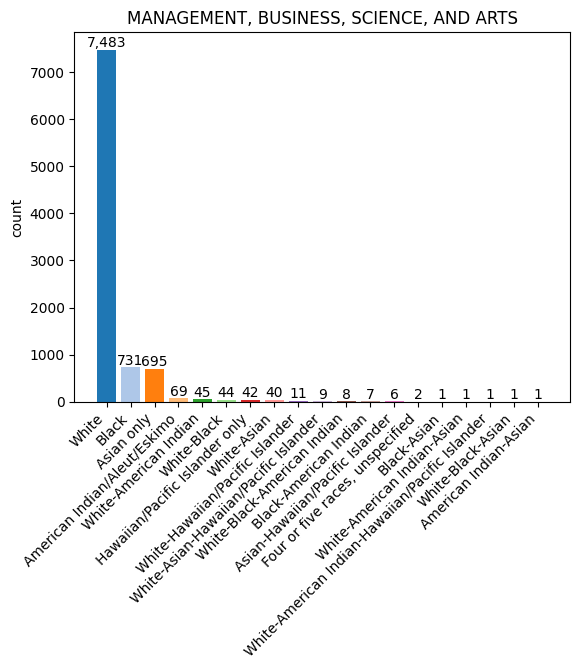

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


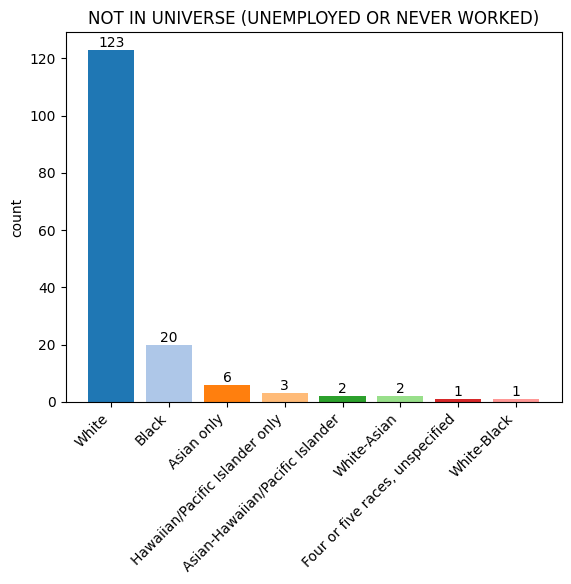

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


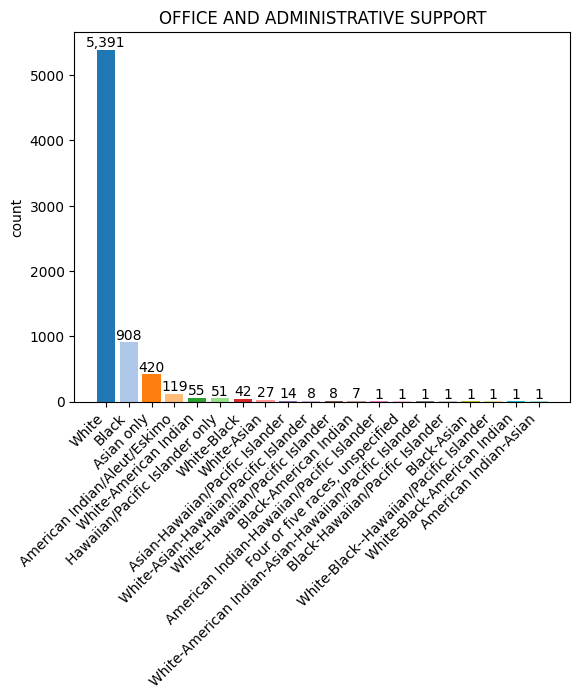

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


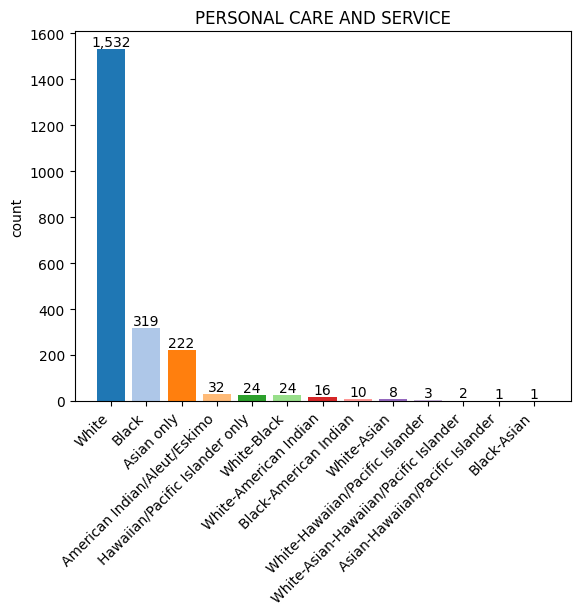

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


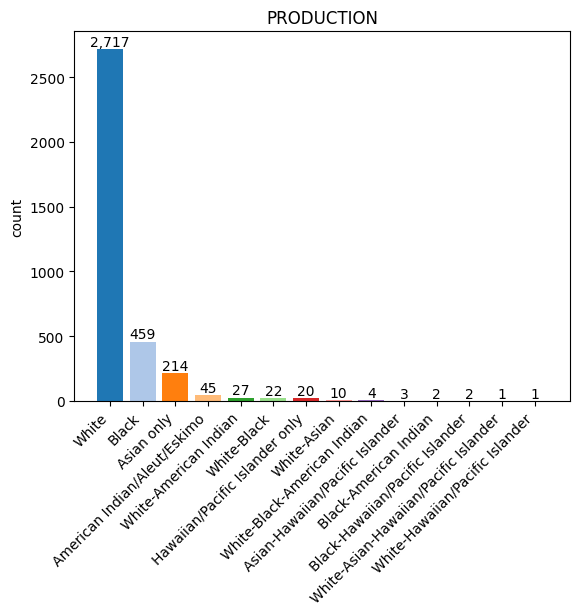

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


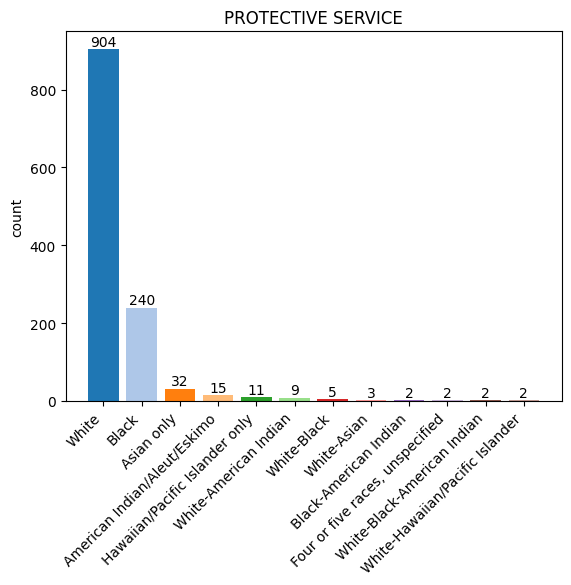

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


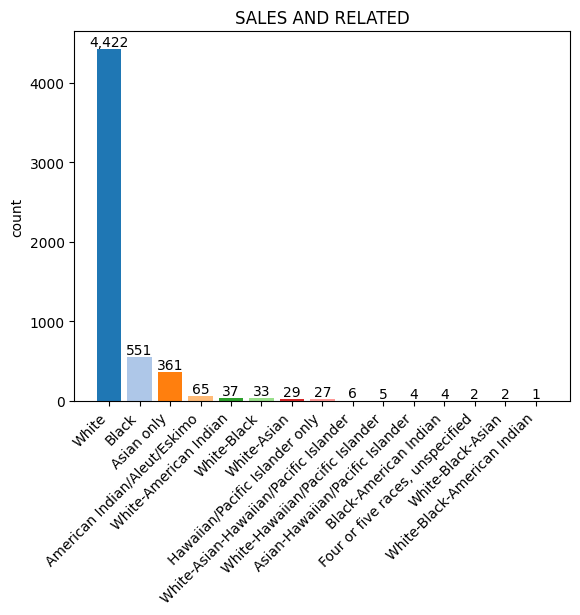

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


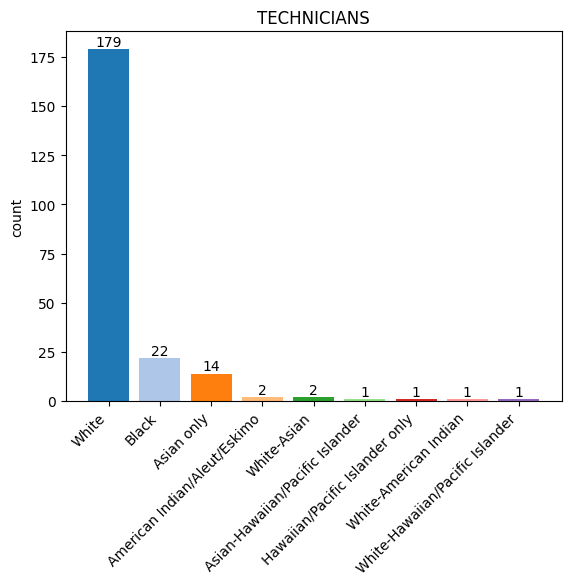

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


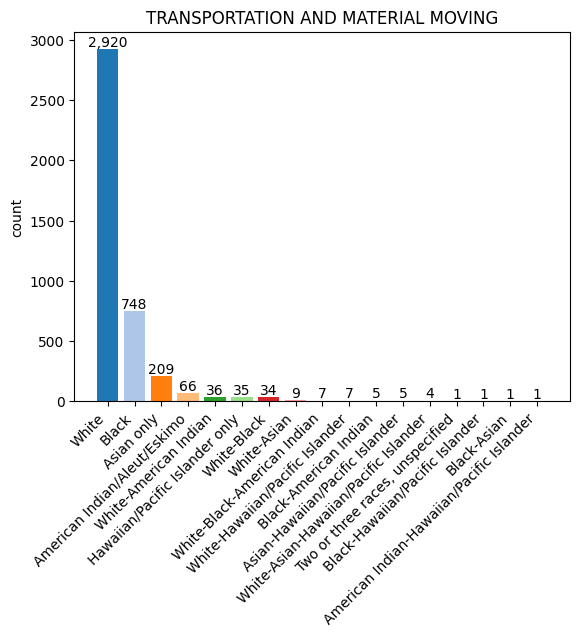

In [155]:
plot_occ_races(race_occ_df, races)

Percentage <br>
Percentage of people belonging to race xy that work in occupation category z.

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titl

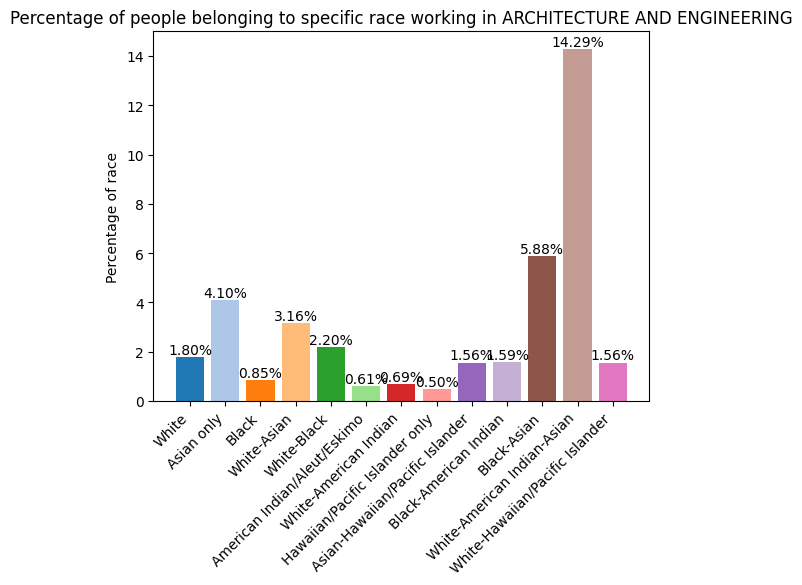

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


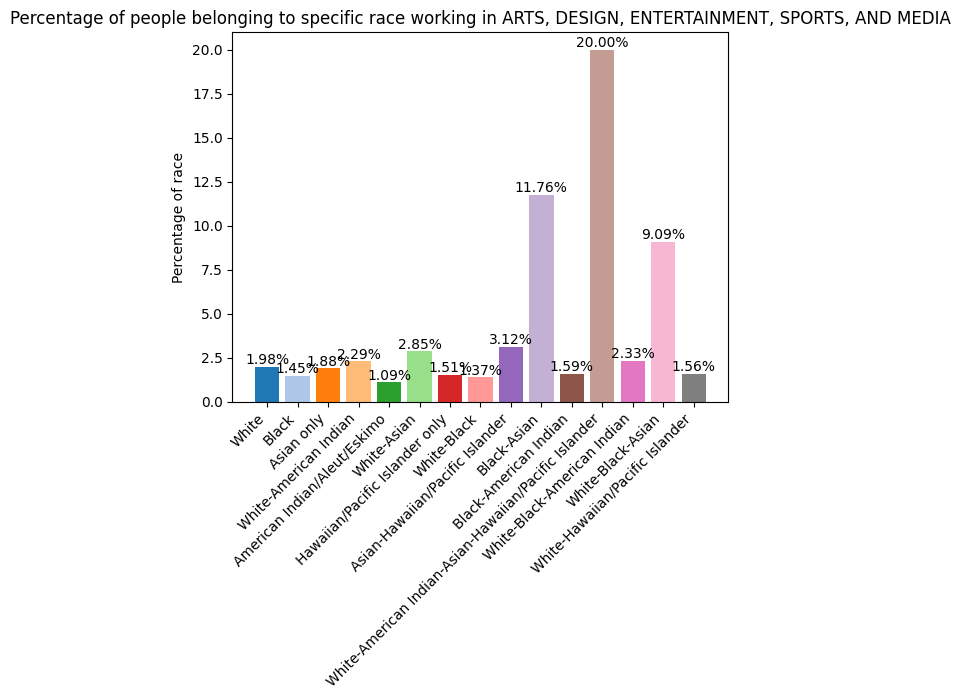

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


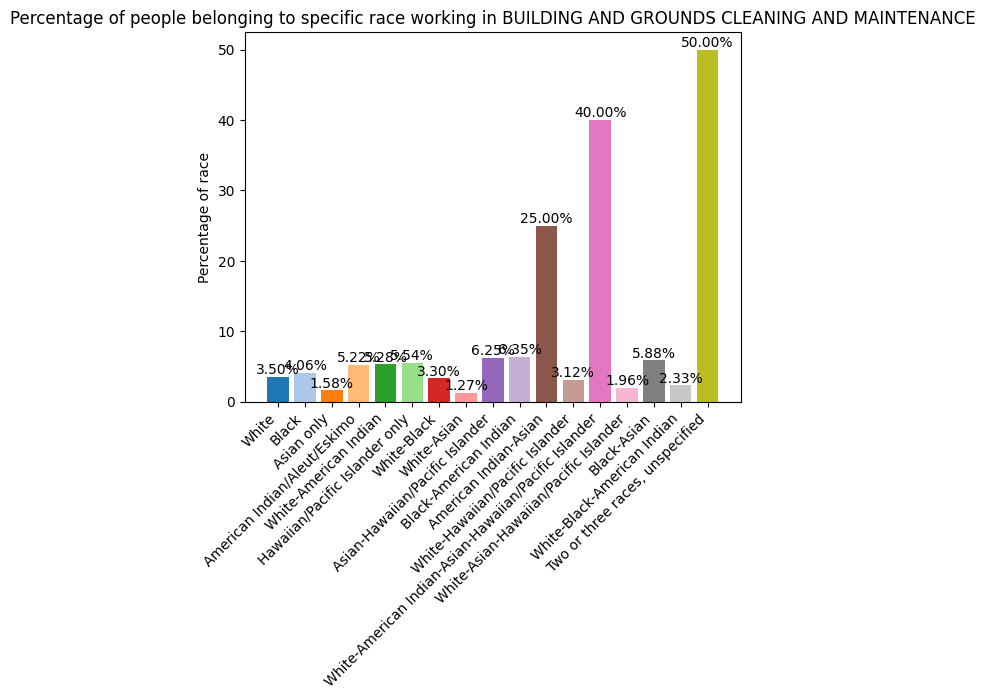

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


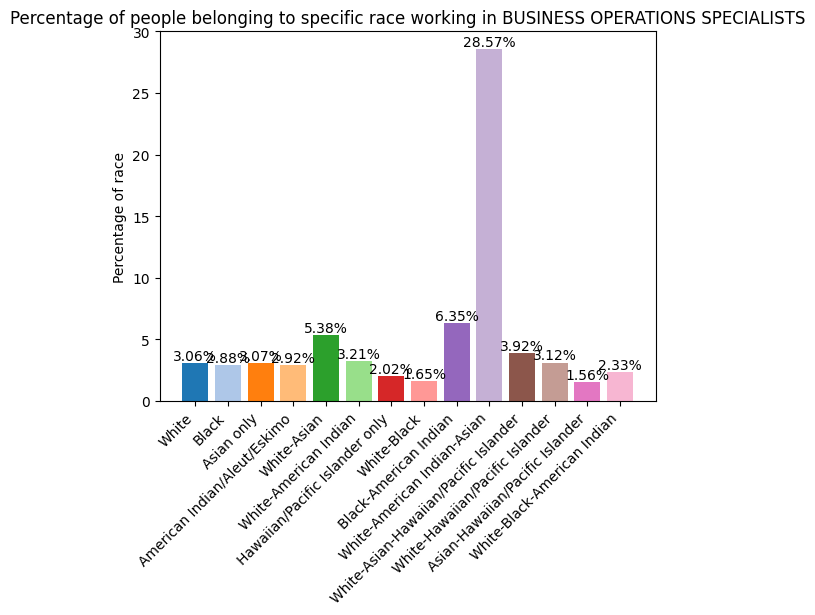

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


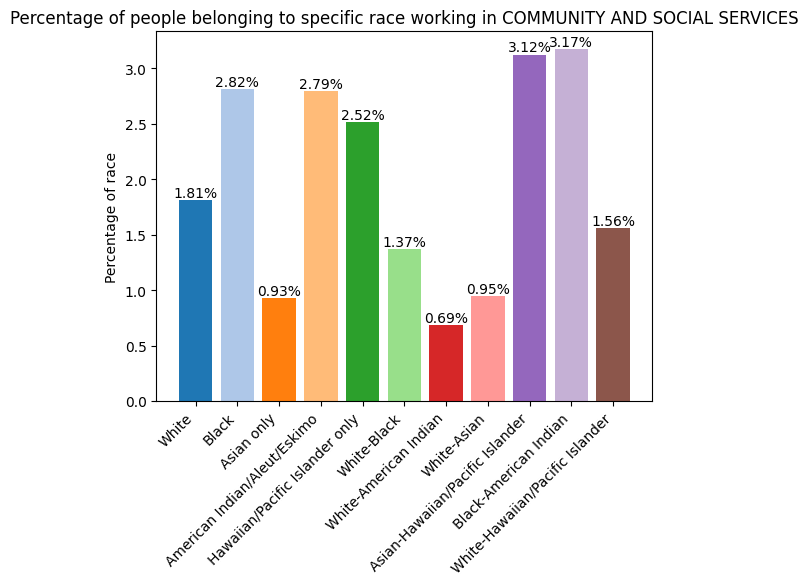

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


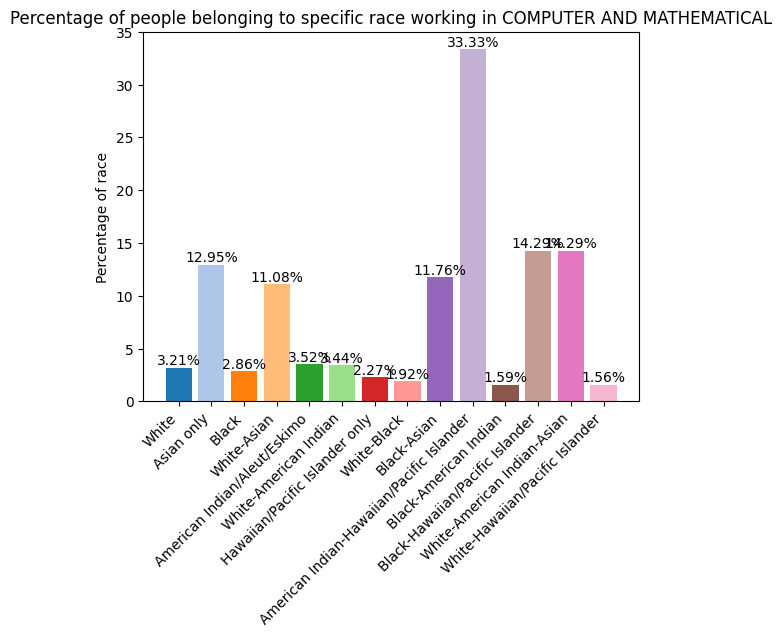

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


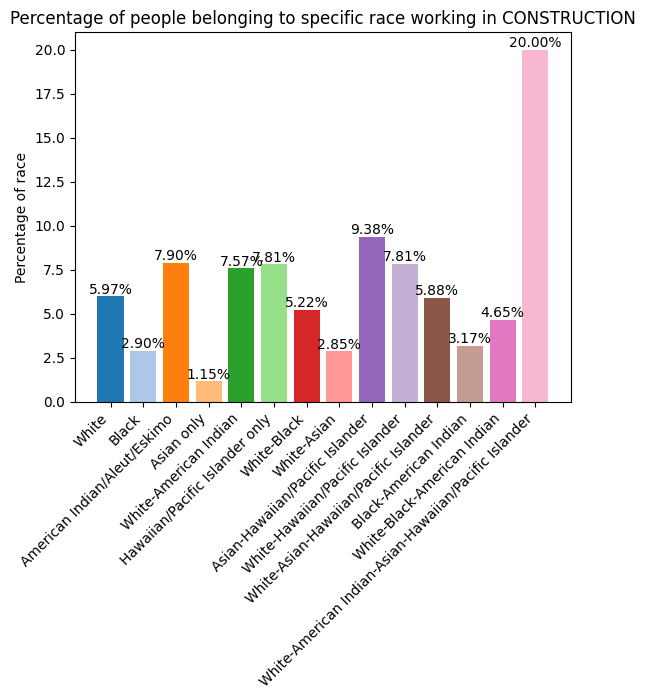

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


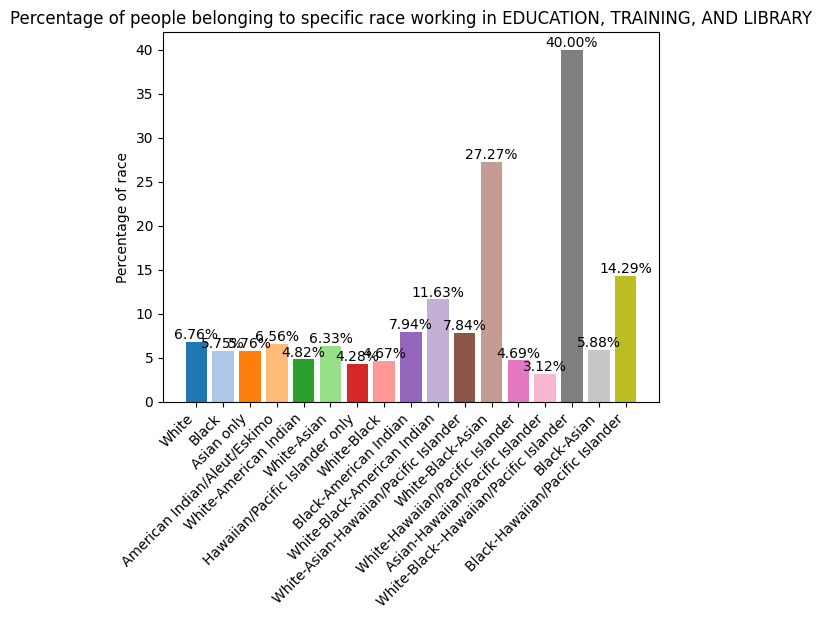

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


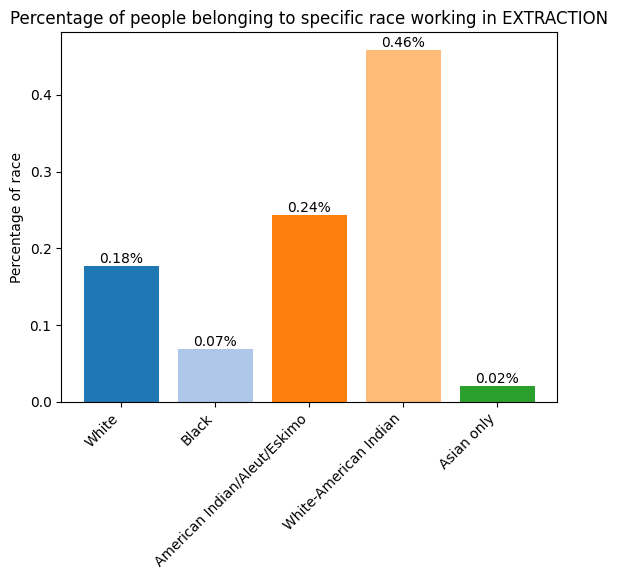

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


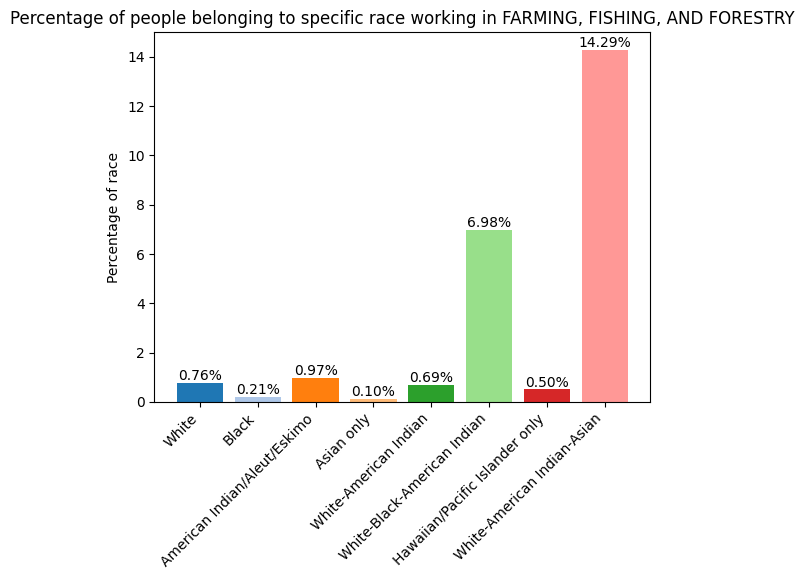

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


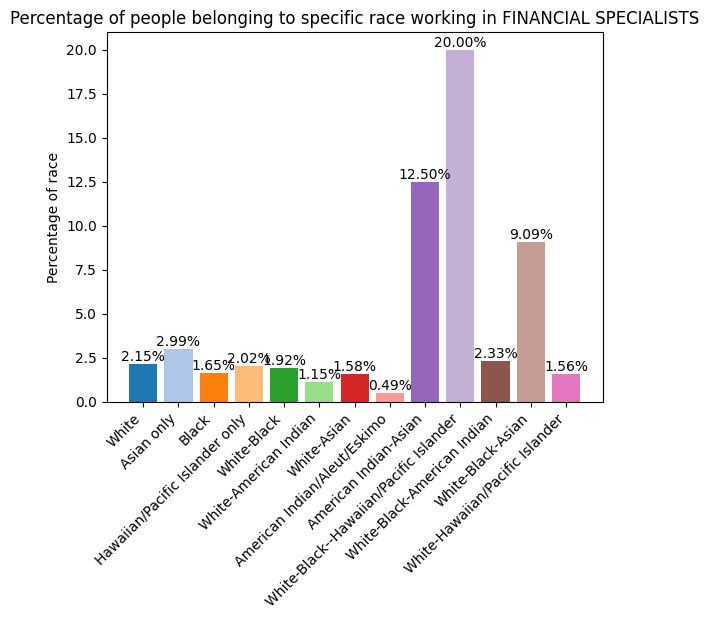

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


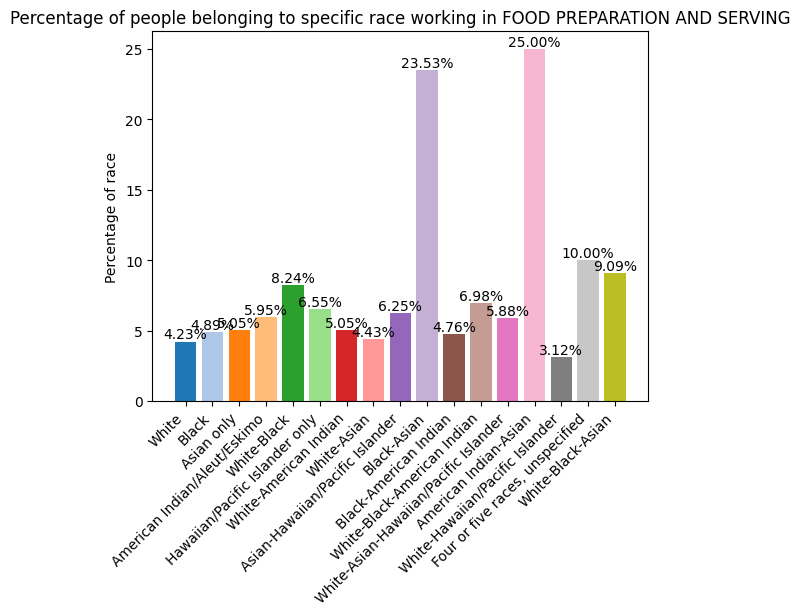

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


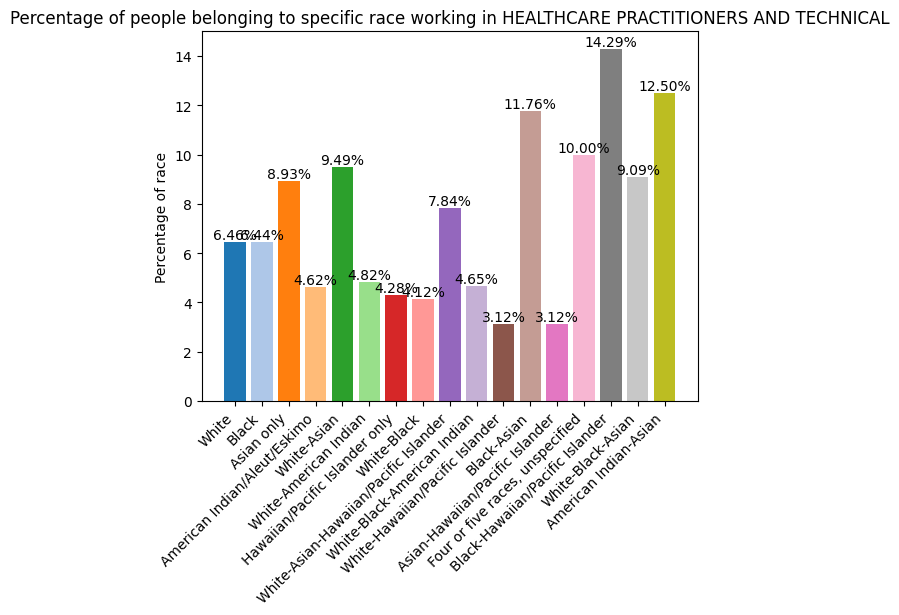

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


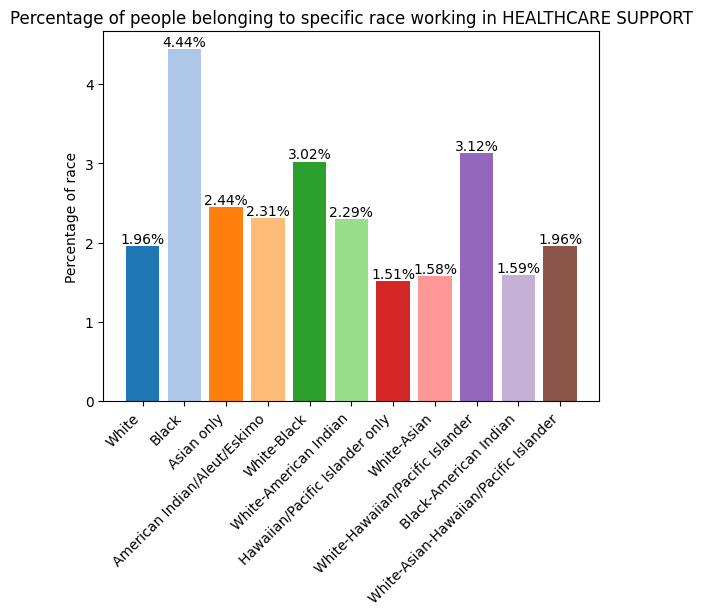

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


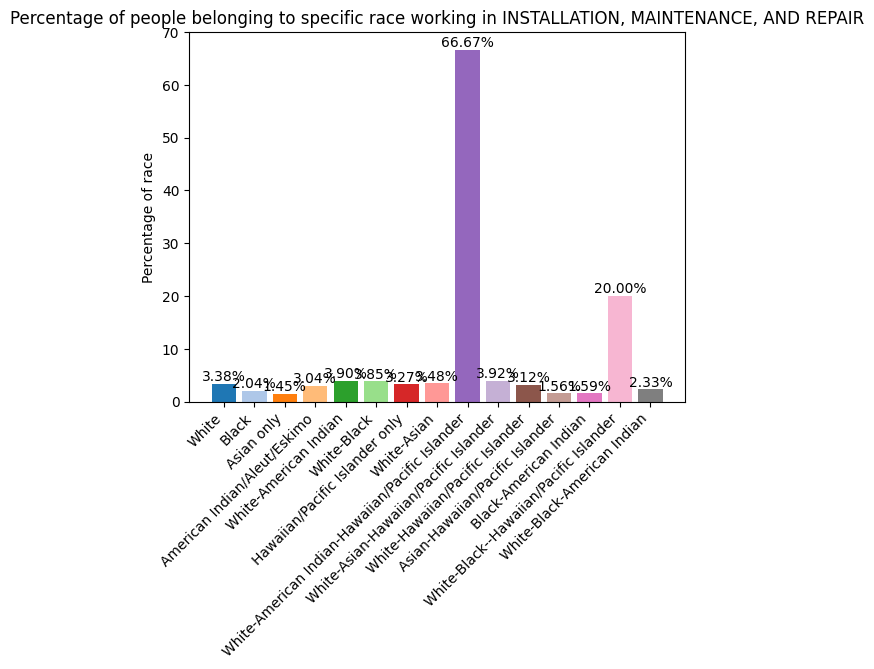

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


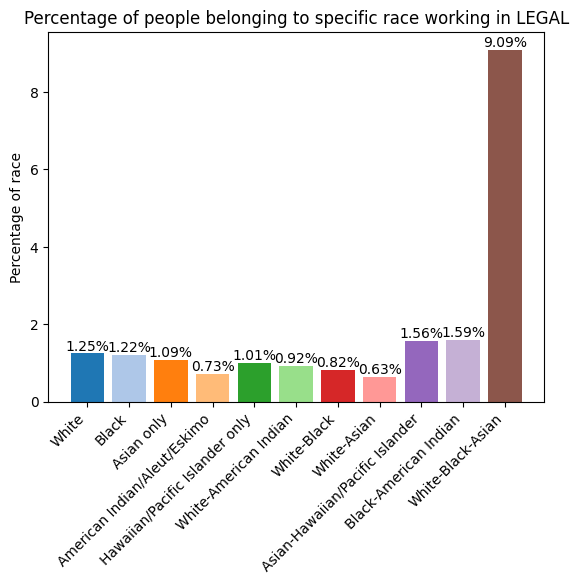

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


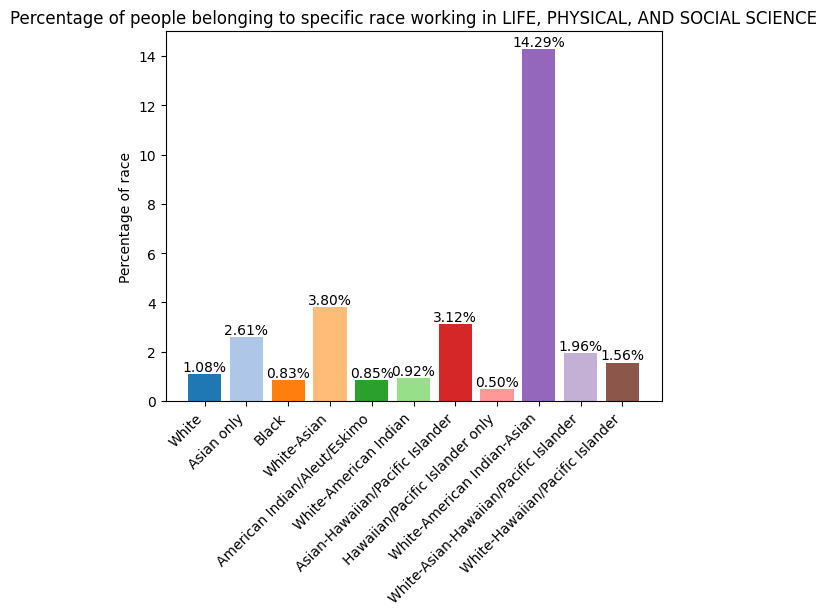

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


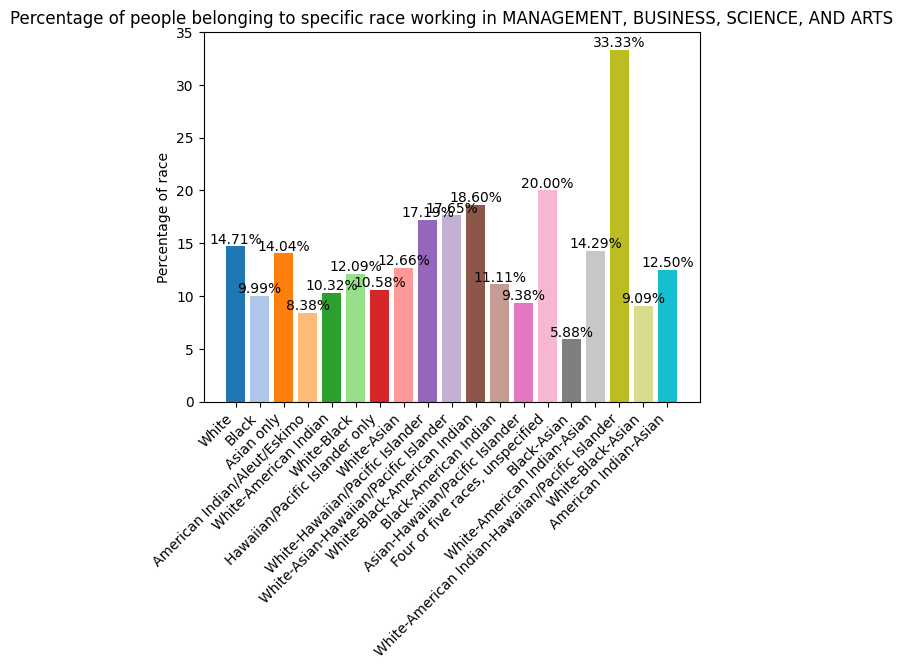

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


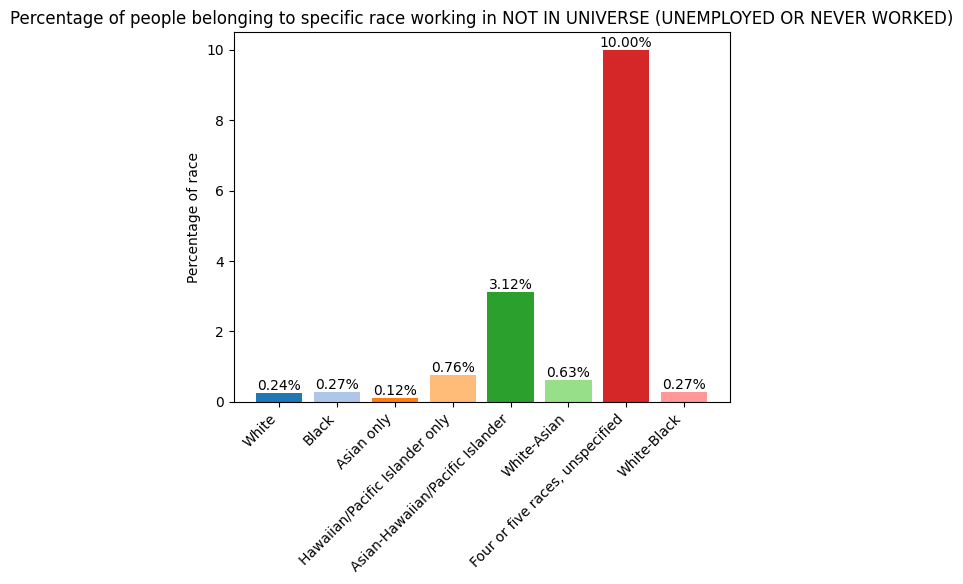

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


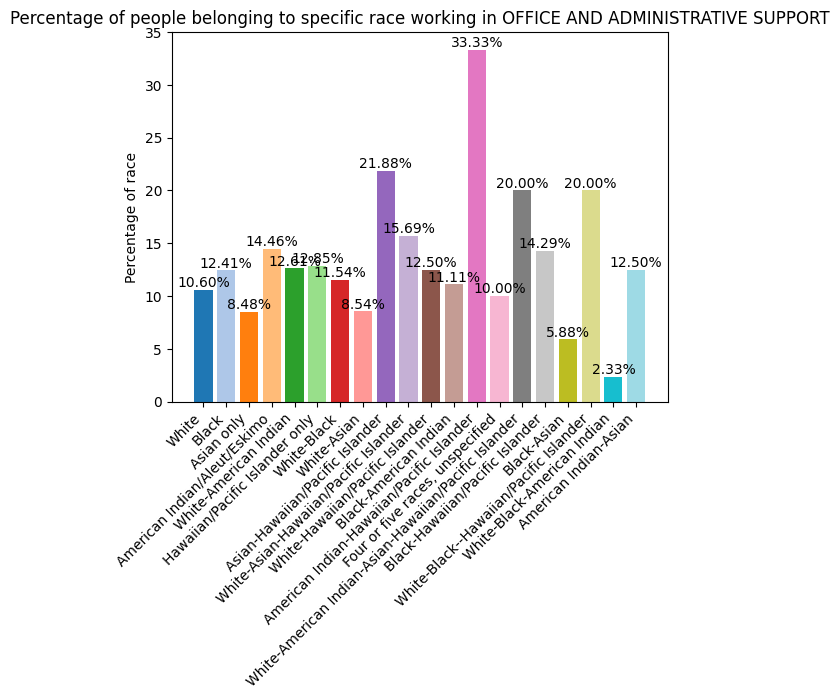

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


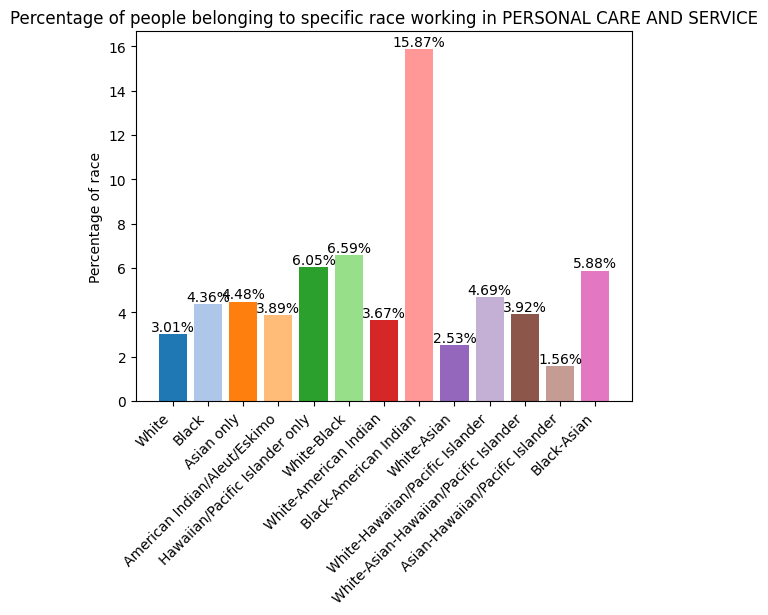

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


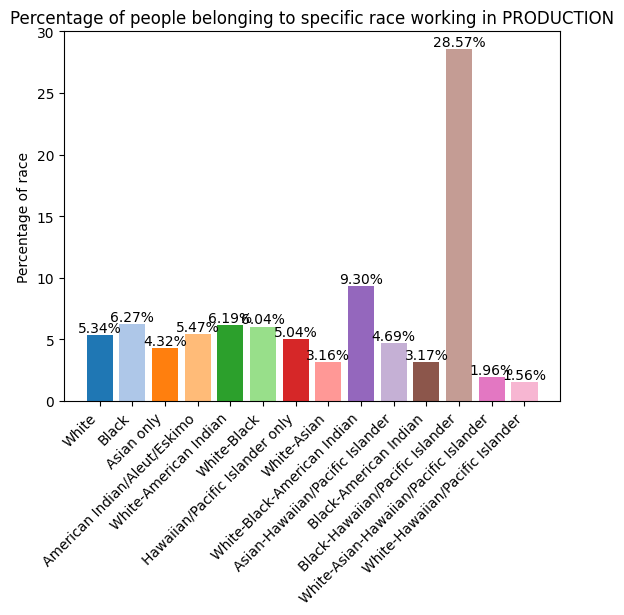

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


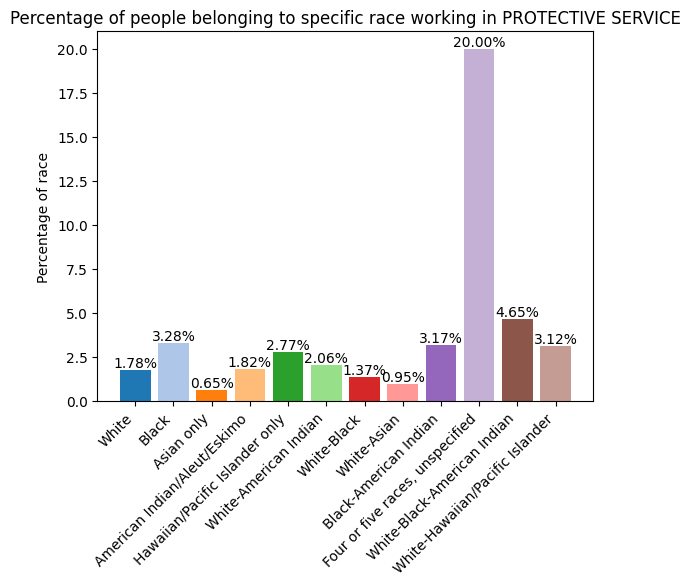

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


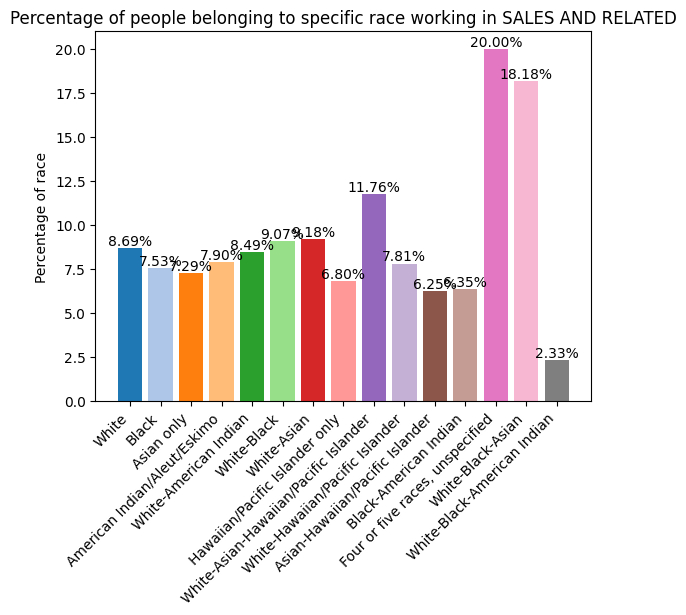

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


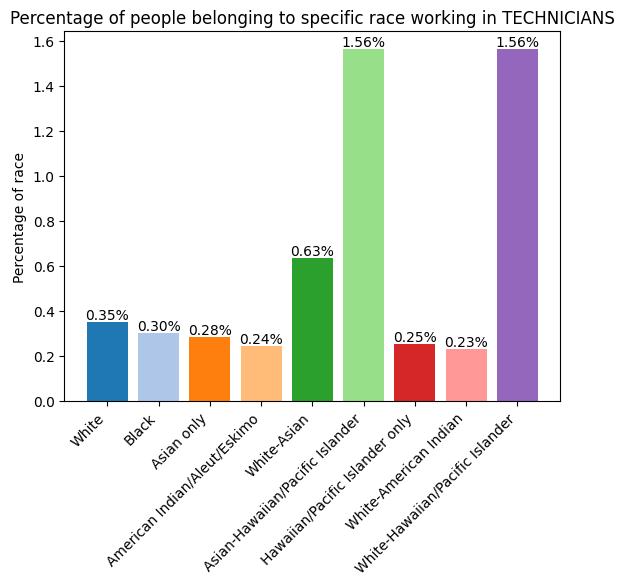

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


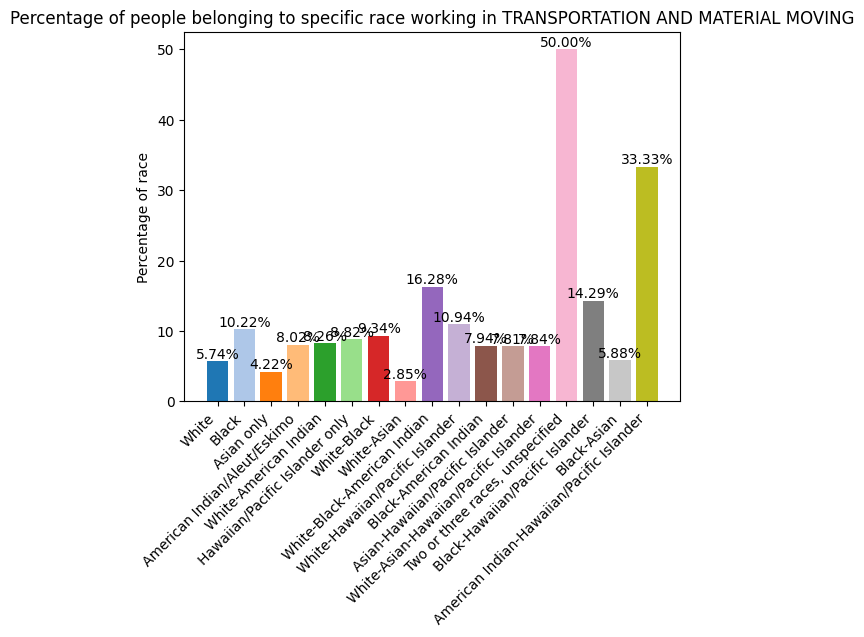

In [156]:
plot_occ_races(race_occ_df, races, True)

Weight (ASECWT)

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title'])['ASECWT'].sum().reset_index()
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('occ_category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles,

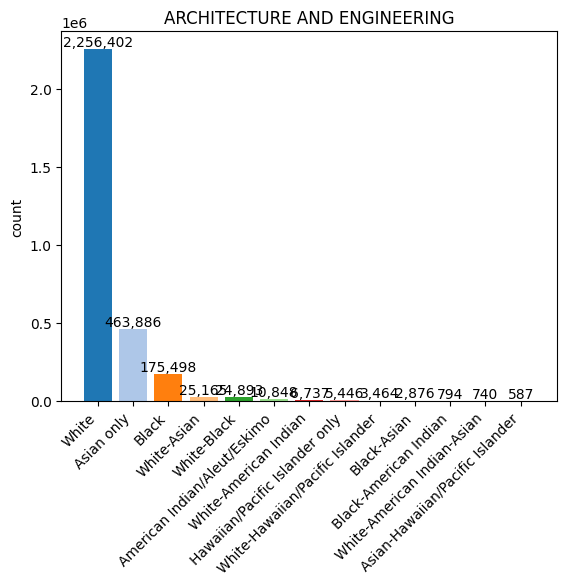

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


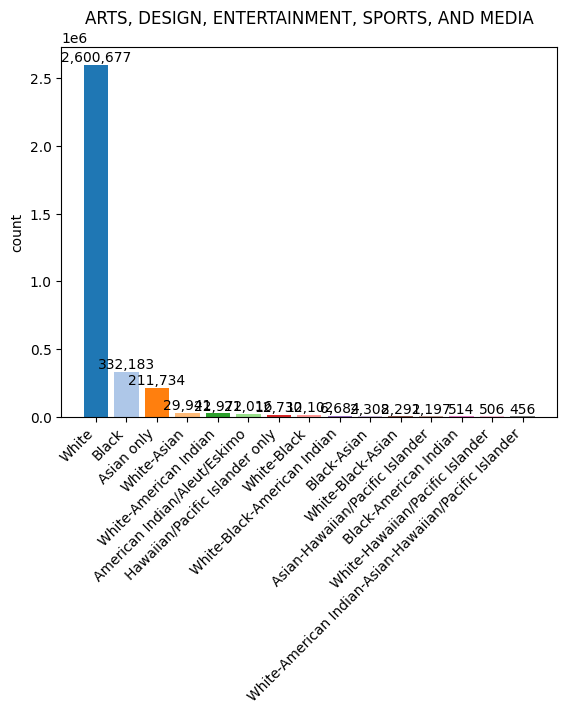

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


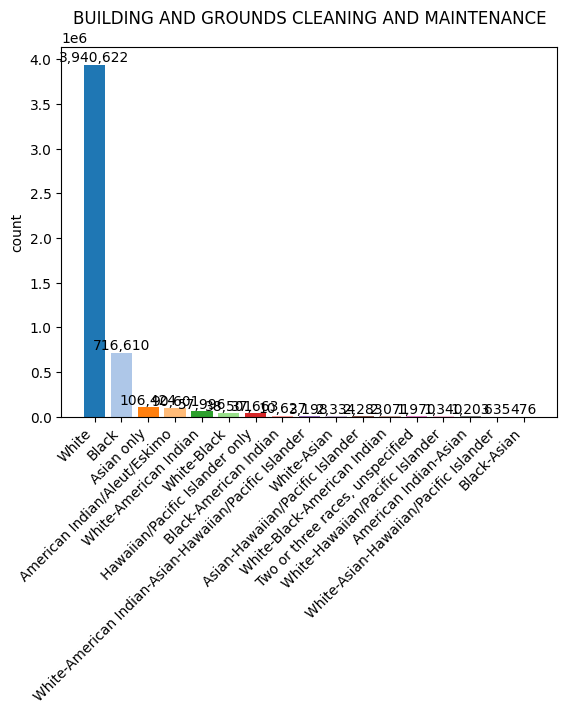

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


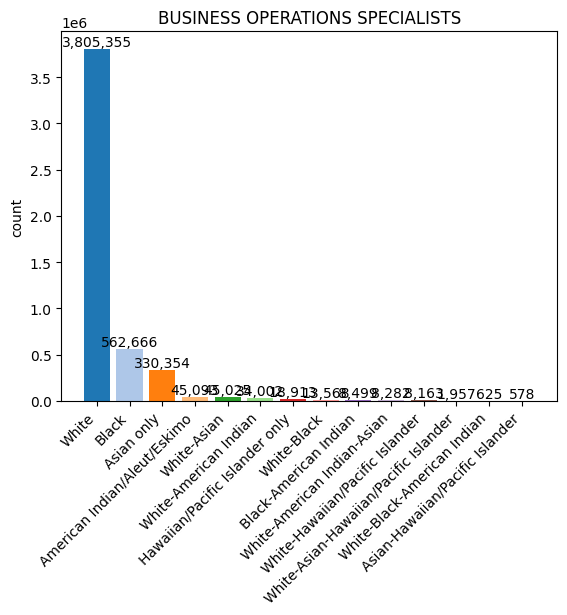

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


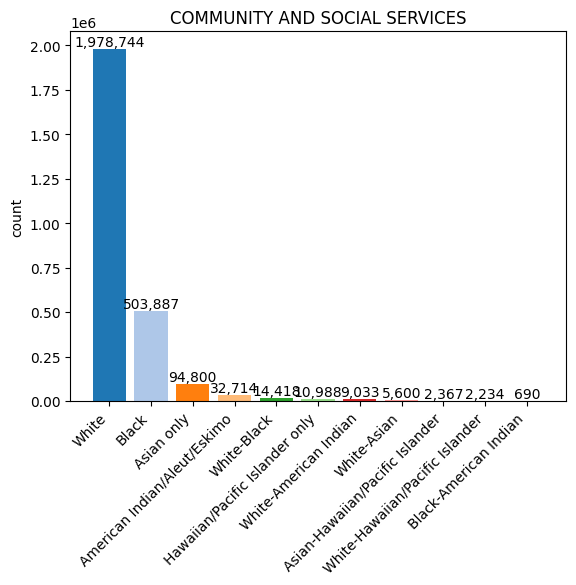

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


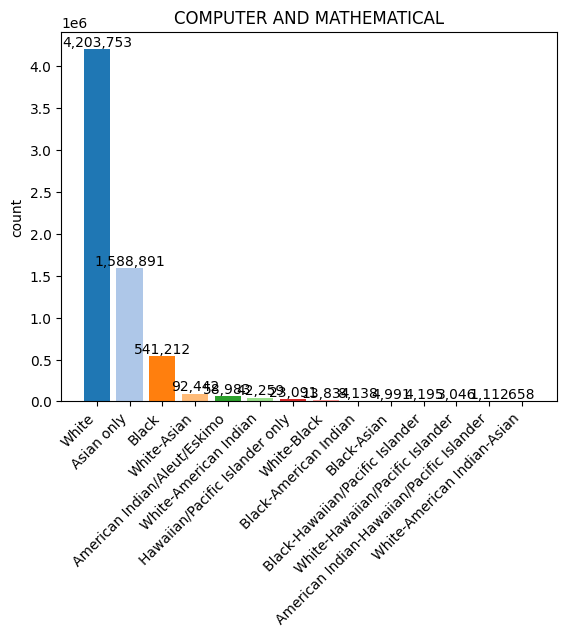

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


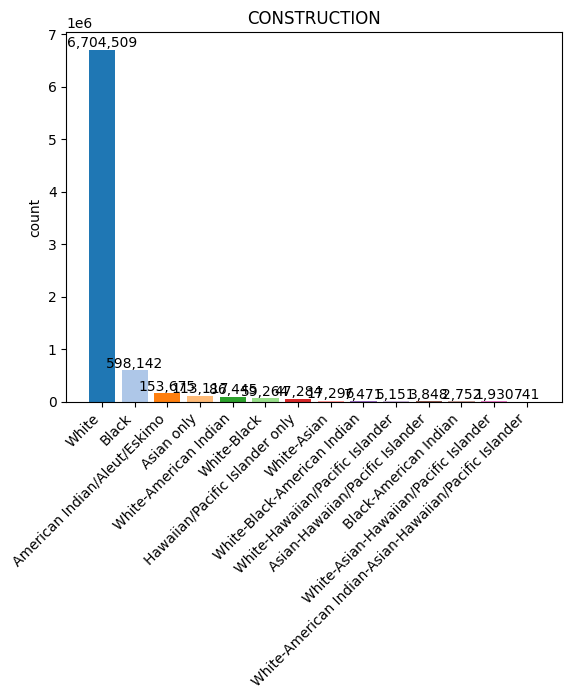

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


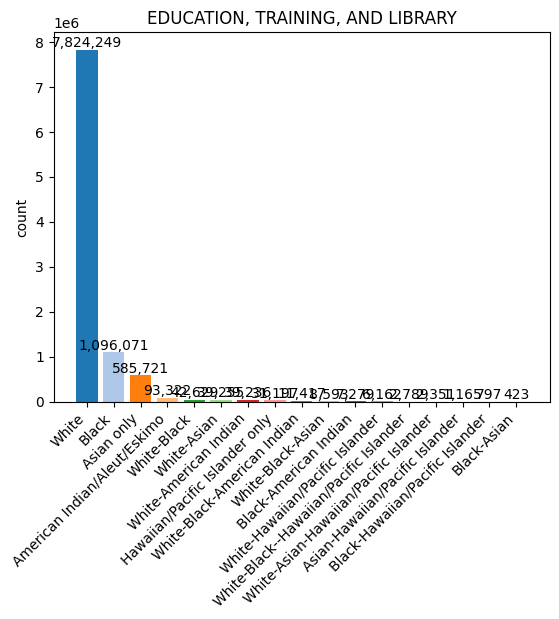

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


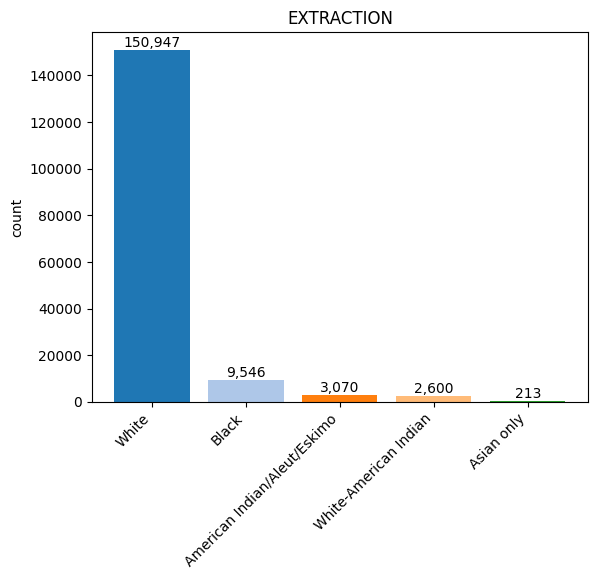

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


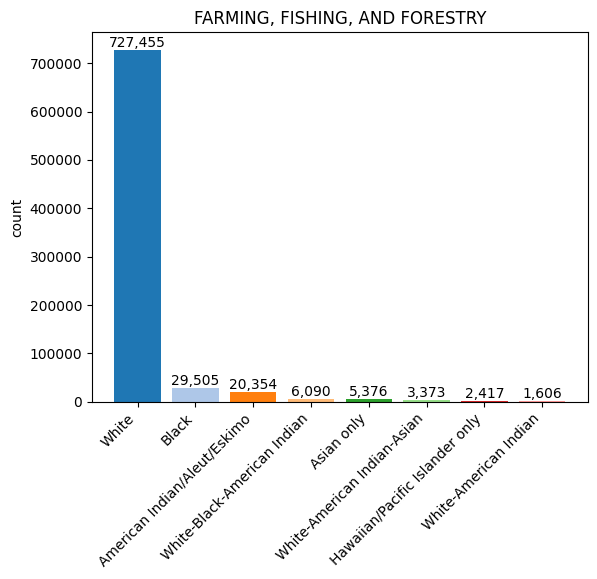

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


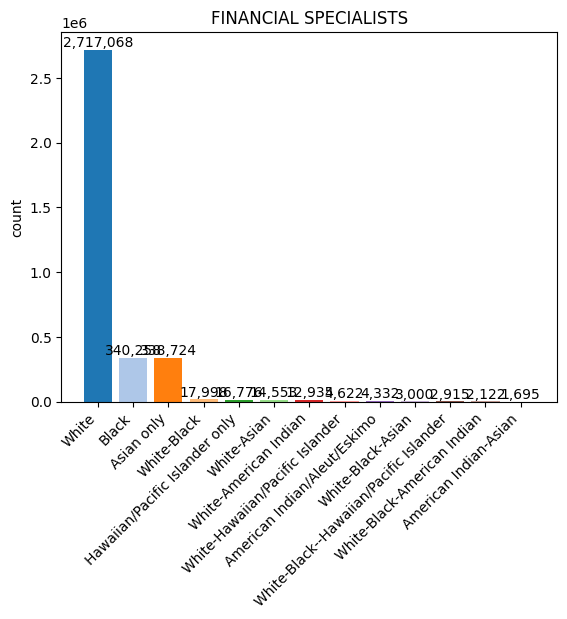

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


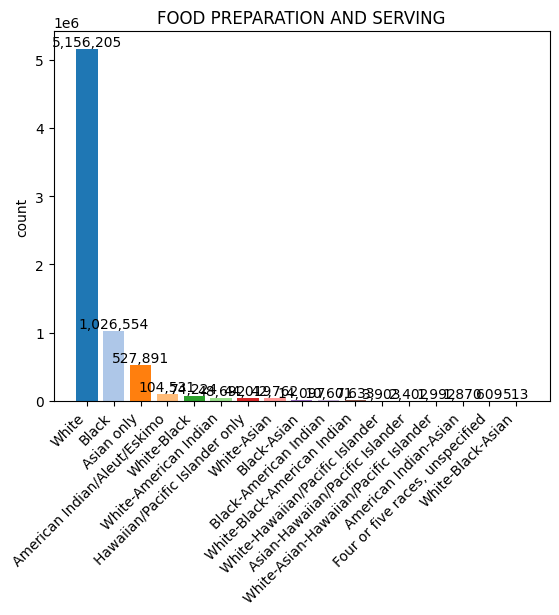

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


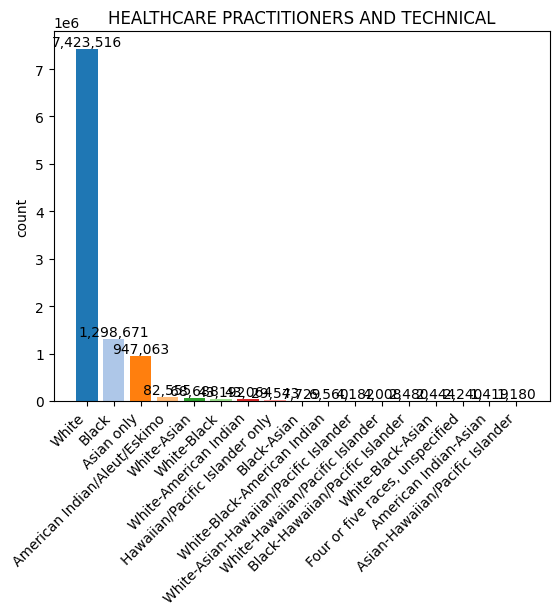

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


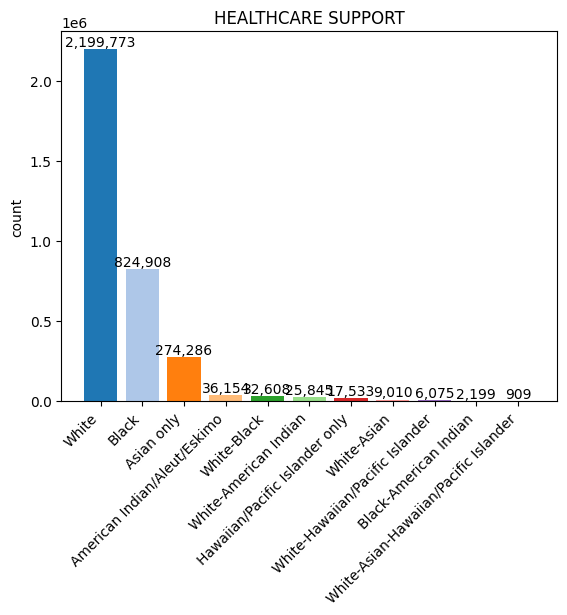

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


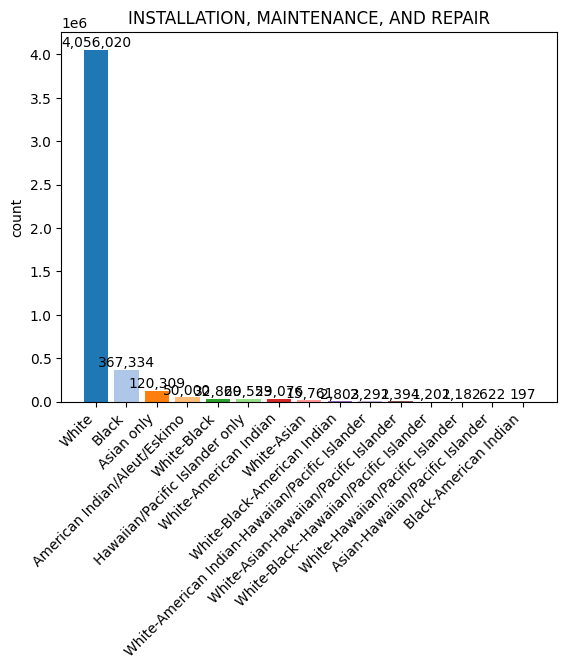

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


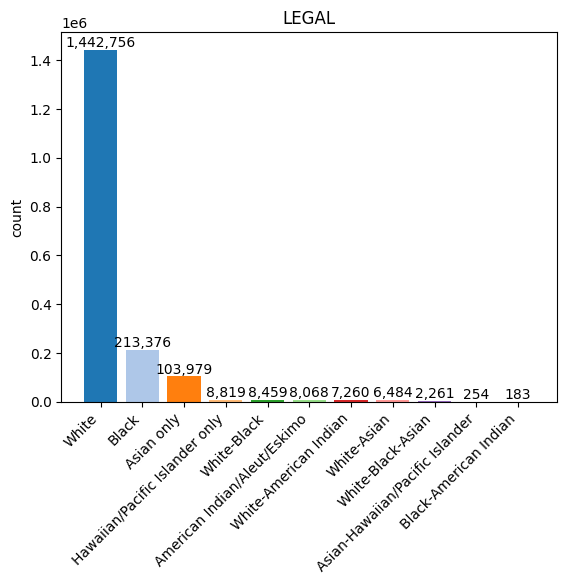

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


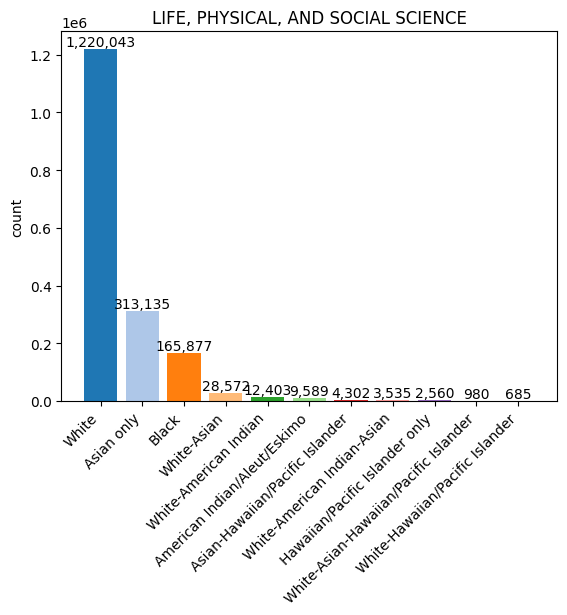

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


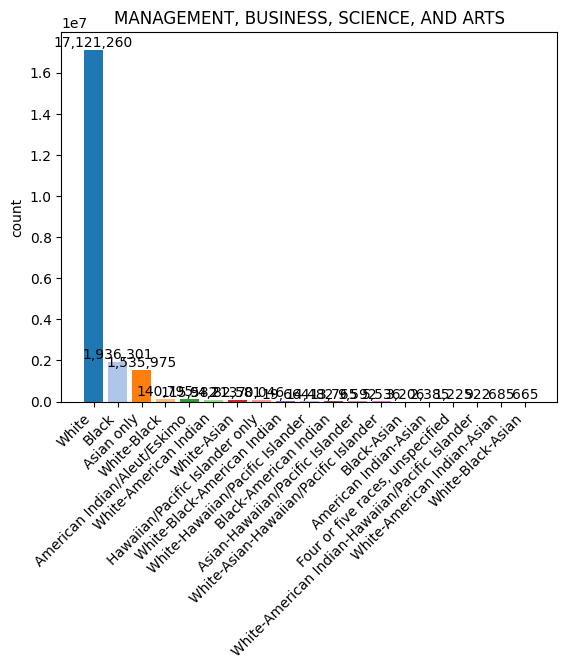

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


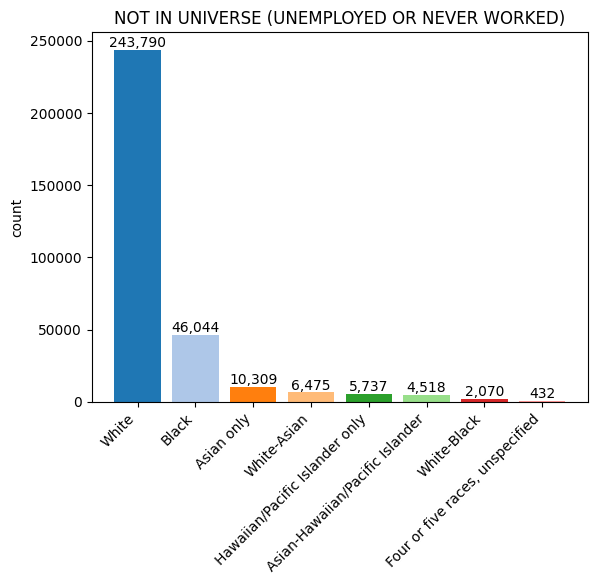

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


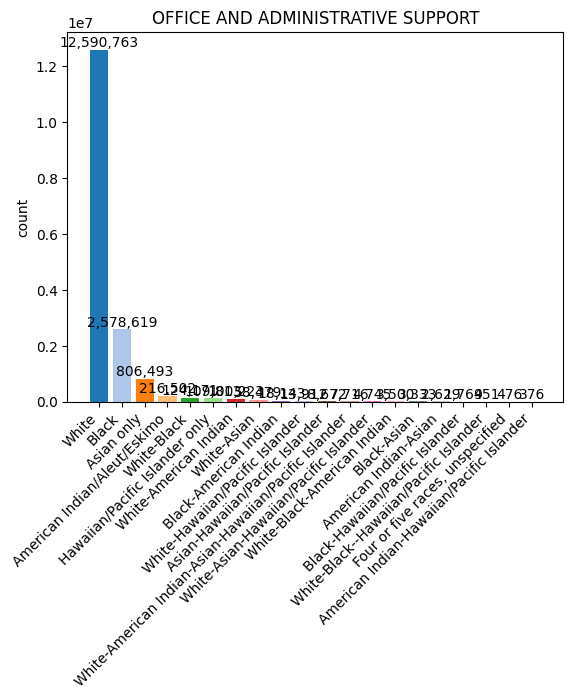

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


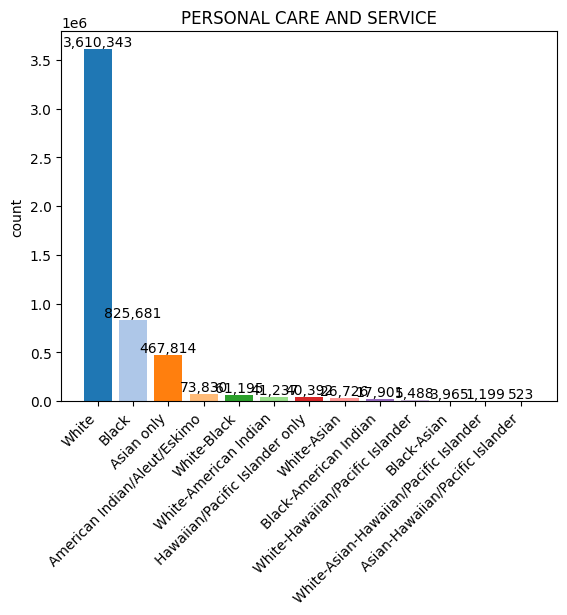

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


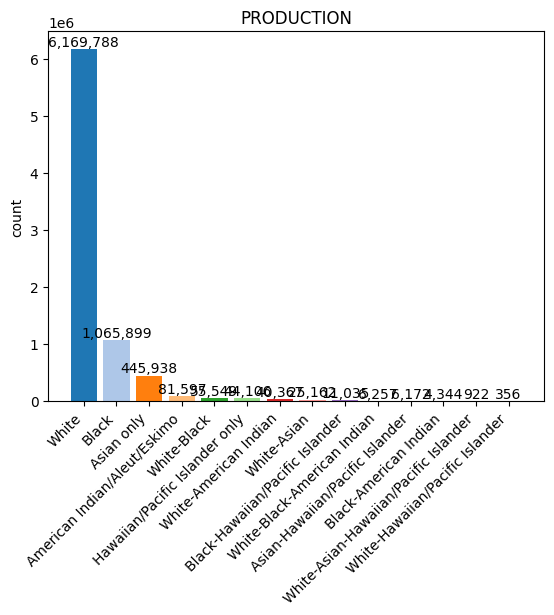

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


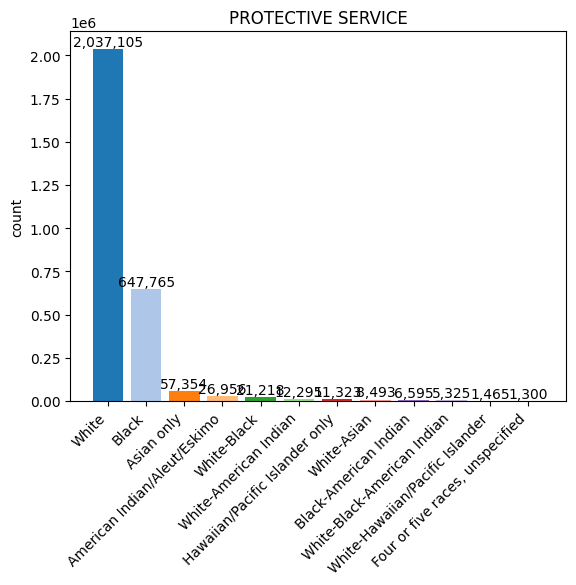

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


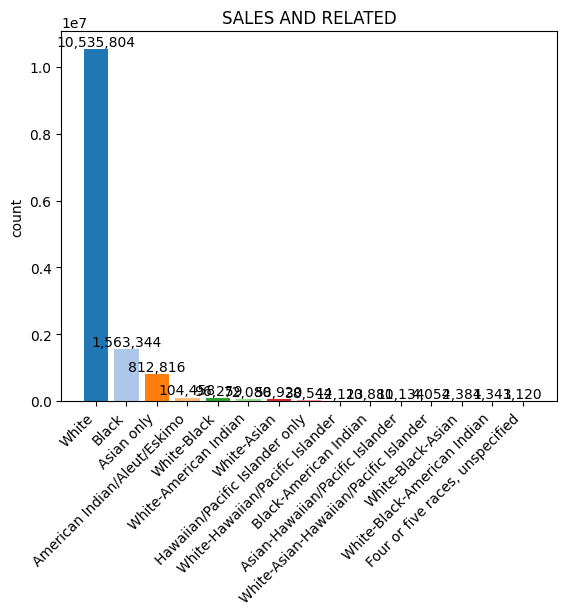

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


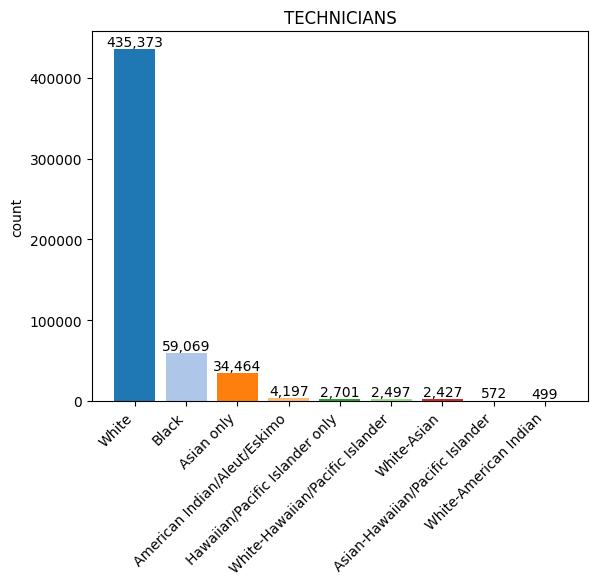

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\923950609.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation = 45, ha='right')


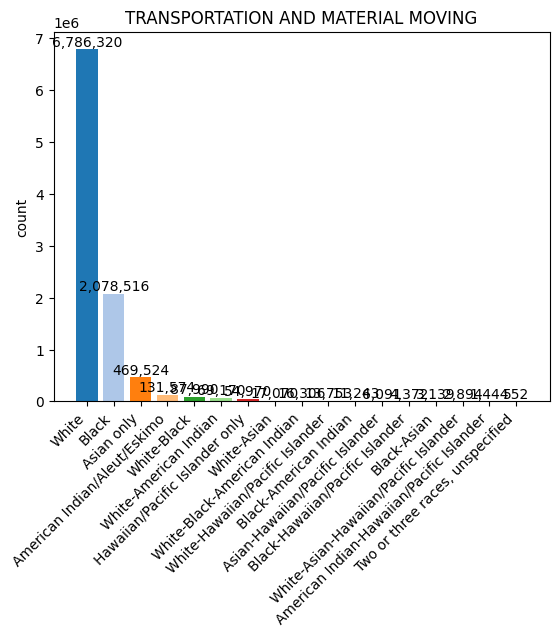

In [157]:
plot_occ_races(race_occ_df, races, percentage=False, weighted=True)

## Did jobs become more diverse in the past years (not that much grouping anymore)?

'Racial categories in the CPS have been more consistent than racial categories in the census. Up through 2002, the number of race categories ranged from 3 (white, negro, and other) to 5 (white, black, American Indian/Eskimo/Aleut, Asian or Pacific Islander, and other). Beginning in 2003, respondents could report more than one race, and the number of codes rose to 21, and then up to 26 codes in 2013.'

Which is why in the following plots the occupation categories seem to be more diverse than before. Most categories are quite similar when it comes to the amount of people of different race working in that field. Most categories have a mean diversity count of 8-12 over the years. However, some 'outliers' can be spotted: 
* *Technichians*: Undiverse category, shows a peak of 10 races working in that field in 2005. Overall its mean diversity count is 6 with a standard deviation of 1.8.
* *Extraction*: Least diverse category, shows a peak of 8 races working in that category in 2013. Overall its mean diversity count is 4 with a standard deviation of 1.3.
* *Farming, Fishing and Forestry*: Undiverse category, shows a peak of 11 in several years. Overall its mean diversity count is 7 with a higher standard deviation of 2.

* *Office and Administrative support*: Most diverse category, shows a peak of 11 races working in that category in 2023. Overall its mean diversity count is 13 with a standard deviation of 6 (which however might be this high because there were less races to choose from before 2003 and hence the high gap).
* Other very diverse categories are:
    * Food preperation and serving
    * Management, Business, Science and Arts
    * Sales and Related
    * Transportation and Material moving

Overall it does not seem like any category got more or less diverse over the years. More diverse categories have always been more diverse and the other way round. Some small inconsistencies are visible over the years, but the overall trend is steady.

diversity count = number of races working in that category

In [158]:
data_df = pd.read_csv(data_path, sep=';')

In [159]:
race_occ_df = pd.DataFrame()
race_occ_df['RACE'] = data_df['RACE']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['ASECWT'] = data_df['ASECWT']
race_occ_df['YEAR'] = data_df['YEAR']

In [160]:
race_occ_df = pd.merge(race_occ_df, race_codes_df, on='RACE')

race_occ_df['occ_category'] = race_occ_df['occ_category'].astype('category')
race_occ_df['race_title'] = race_occ_df['race_title'].astype('category')

In [161]:
def print_nr_races_yearly(year: int, show_race_titles: bool = False):
    """
    print diversity information about a specific year
    """
    print(f'Nr. of races {year}: ', len(race_occ_df[race_occ_df['YEAR'] == year]['race_title'].unique()))

    if show_race_titles:
        print(race_occ_df[race_occ_df['YEAR'] == year]['race_title'].unique().tolist())

In [162]:
print_nr_races_yearly(1992, show_race_titles=True)
print_nr_races_yearly(2002)
print_nr_races_yearly(2003, show_race_titles=True)
print_nr_races_yearly(2013, show_race_titles=True)

Nr. of races 1992:  5
['White', 'Black', 'Other (single) race, n.e.c.', 'American Indian/Aleut/Eskimo', 'Asian or Pacific Islander']
Nr. of races 2002:  4
Nr. of races 2003:  21
['White', 'Black', 'American Indian/Aleut/Eskimo', 'Asian only', 'White-American Indian', 'Black-American Indian', 'White-Black-American Indian', 'Hawaiian/Pacific Islander only', 'White-Black', 'White-Asian', 'American Indian-Asian', 'Asian-Hawaiian/Pacific Islander', 'Two or three races, unspecified', 'Four or five races, unspecified', 'White-Asian-Hawaiian/Pacific Islander', 'White-Hawaiian/Pacific Islander', 'White-Black-Asian', 'Black-Asian', 'Black-Hawaiian/Pacific Islander', 'White-Black-American Indian-Asian', 'White-American Indian-Asian']
Nr. of races 2013:  25
['White', 'Black', 'American Indian/Aleut/Eskimo', 'Asian only', 'White-American Indian', 'Black-American Indian', 'White-Black-American Indian', 'Hawaiian/Pacific Islander only', 'White-Black', 'White-Asian', 'American Indian-Asian', 'Asian-Ha

In [163]:
race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\3508755367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')


occ_category                       race_title  \
0            ARCHITECTURE AND ENGINEERING            American Indian-Asian   
1            ARCHITECTURE AND ENGINEERING            American Indian-Asian   
2            ARCHITECTURE AND ENGINEERING            American Indian-Asian   
3            ARCHITECTURE AND ENGINEERING            American Indian-Asian   
4            ARCHITECTURE AND ENGINEERING            American Indian-Asian   
...                                   ...                              ...   
40763  TRANSPORTATION AND MATERIAL MOVING  White-Hawaiian/Pacific Islander   
40764  TRANSPORTATION AND MATERIAL MOVING  White-Hawaiian/Pacific Islander   
40765  TRANSPORTATION AND MATERIAL MOVING  White-Hawaiian/Pacific Islander   
40766  TRANSPORTATION AND MATERIAL MOVING  White-Hawaiian/Pacific Islander   
40767  TRANSPORTATION AND MATERIAL MOVING  White-Hawaiian/Pacific Islander   

       YEAR  count  
0      1968      0  
1      1969      0  
2      1970      0  
3      1971      0  
4      1972      0  
...     ...    ...  
40763  2019      3  
40764  2020      4  
40765  2021      1  
40766  2022      3  
40767  2023      7  

[40768 rows x 4 columns]

C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2256395250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_10848\2256395250.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (occupation_category, group_df), ax in zip(grouped_df.groupby('occ_category'), axs):


Text(0.5, 0.94, 'Diversity per occupation category over the years')

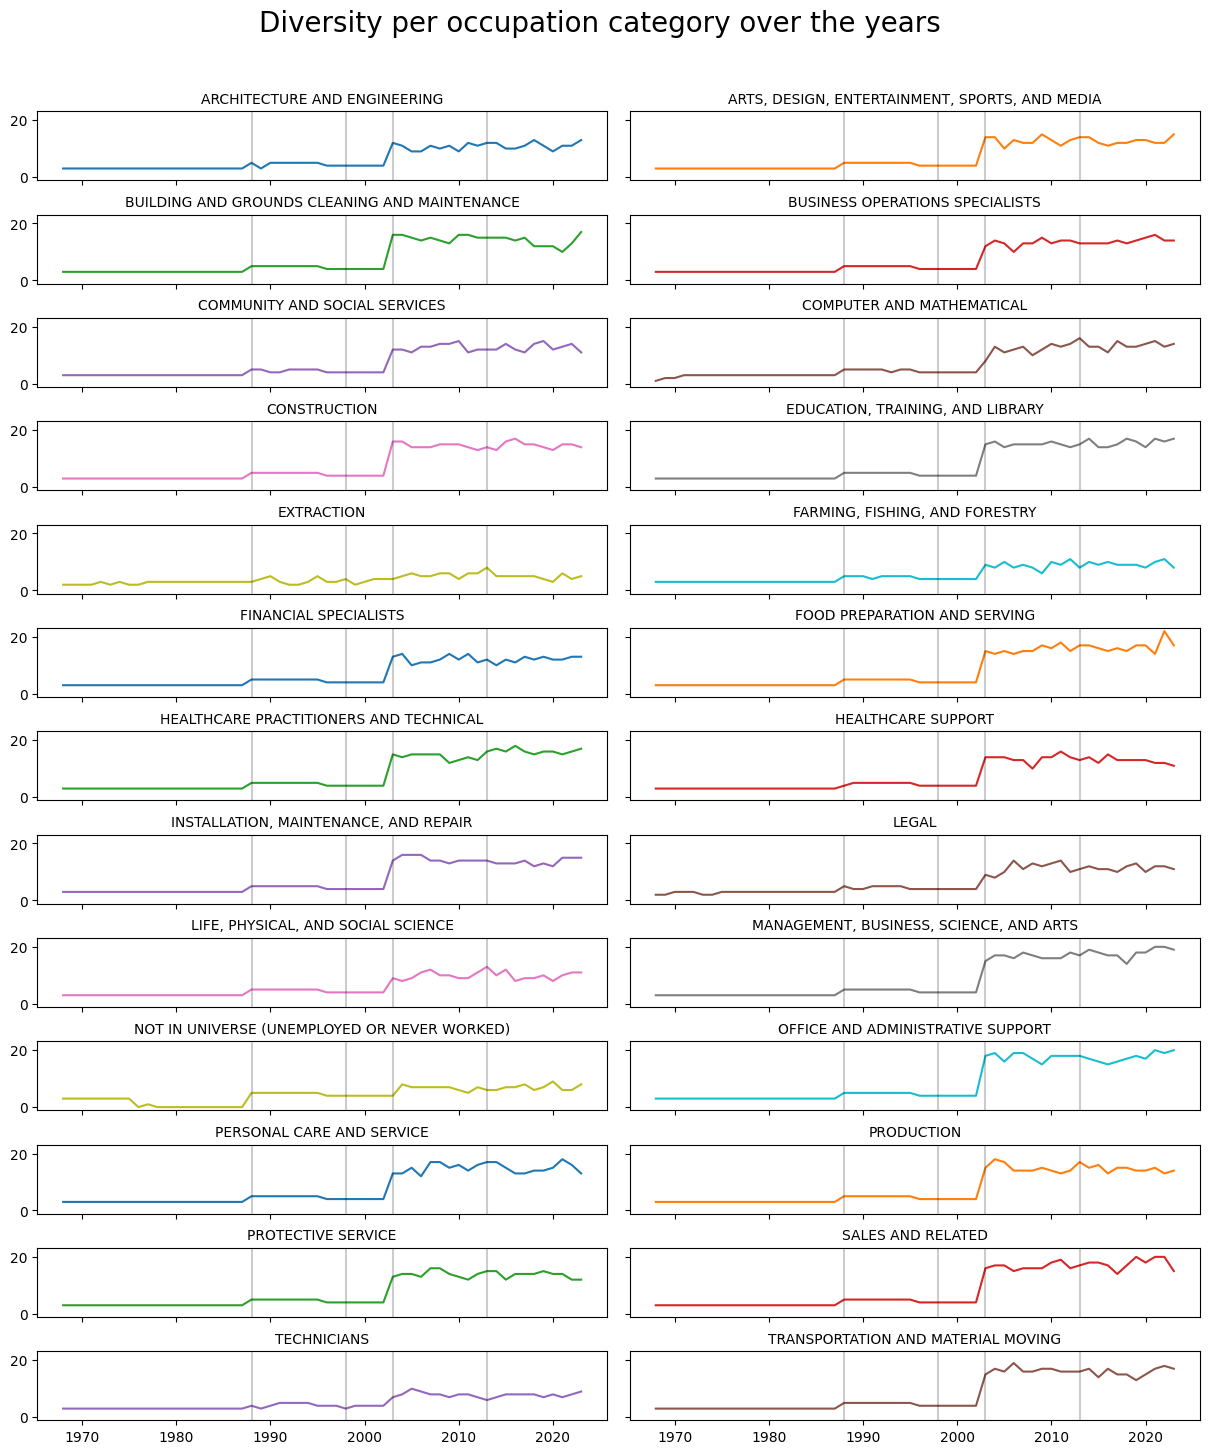

In [167]:
grouped_df = race_occ_df.groupby(['occ_category', 'race_title', 'YEAR']).size().reset_index(name='count')

fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)
colors = plt.rcParams["axes.prop_cycle"]()
for (occupation_category, group_df), ax in zip(grouped_df.groupby('occ_category'), axs):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot_table(index=['YEAR'], columns='race_title', values='count', fill_value=0)

    pivot_df['nr_races'] = (pivot_df != 0.0).sum(1)
    pivot_df = pivot_df.reset_index()

    c = next(colors)["color"]
    ax.plot(pivot_df['YEAR'], pivot_df['nr_races'], color=c)
    ax.set_title(occupation_category, fontsize =10)

    ax.axvline(x=1988, color='black', alpha=0.2)
    ax.axvline(x=1998, color='black', alpha=0.2)
    ax.axvline(x=2003, color='black', alpha=0.2)
    ax.axvline(x=2013, color='black', alpha=0.2)


fig.suptitle('Diversity per occupation category over the years',ha='center', fontsize=20, y = 0.94)

In [168]:
df = race_occ_df[['YEAR', 'occ_category', 'RACE']]
pivot_df = df.pivot_table(index='occ_category', columns='YEAR', aggfunc=lambda x: len(set(x)))
pivot_df['mean'] = pivot_df.mean(axis=1)
pivot_df['sd'] = pivot_df.std(axis=1)
display(pivot_df)

RACE                           \
YEAR                                           1968 1969 1970 1971 1972 1973   
occ_category                                                                   
ARCHITECTURE AND ENGINEERING                    3.0  3.0  3.0  3.0  3.0  3.0   
ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  3.0  3.0  3.0  3.0  3.0  3.0   
BUILDING AND GROUNDS CLEANING AND MAINTENANCE   3.0  3.0  3.0  3.0  3.0  3.0   
BUSINESS OPERATIONS SPECIALISTS                 3.0  3.0  3.0  3.0  3.0  3.0   
COMMUNITY AND SOCIAL SERVICES                   3.0  3.0  3.0  3.0  3.0  3.0   
COMPUTER AND MATHEMATICAL                       1.0  2.0  2.0  3.0  3.0  3.0   
CONSTRUCTION                                    3.0  3.0  3.0  3.0  3.0  3.0   
EDUCATION, TRAINING, AND LIBRARY                3.0  3.0  3.0  3.0  3.0  3.0   
EXTRACTION                                      2.0  2.0  2.0  2.0  3.0  2.0   
FARMING, FISHING, AND FORESTRY                  3.0  3.0  3.0  3.0  3.0  3.0   
FINANCIAL SPECIALISTS                           3.0  3.0  3.0  3.0  3.0  3.0   
FOOD PREPARATION AND SERVING                    3.0  3.0  3.0  3.0  3.0  3.0   
HEALTHCARE PRACTITIONERS AND TECHNICAL          3.0  3.0  3.0  3.0  3.0  3.0   
HEALTHCARE SUPPORT                              3.0  3.0  3.0  3.0  3.0  3.0   
INSTALLATION, MAINTENANCE, AND REPAIR           3.0  3.0  3.0  3.0  3.0  3.0   
LEGAL                                           2.0  2.0  3.0  3.0  3.0  2.0   
LIFE, PHYSICAL, AND SOCIAL SCIENCE              3.0  3.0  3.0  3.0  3.0  3.0   
MANAGEMENT, BUSINESS, SCIENCE, AND ARTS         3.0  3.0  3.0  3.0  3.0  3.0   
NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)    3.0  3.0  3.0  3.0  3.0  3.0   
OFFICE AND ADMINISTRATIVE SUPPORT               3.0  3.0  3.0  3.0  3.0  3.0   
PERSONAL CARE AND SERVICE                       3.0  3.0  3.0  3.0  3.0  3.0   
PRODUCTION                                      3.0  3.0  3.0  3.0  3.0  3.0   
PROTECTIVE SERVICE                              3.0  3.0  3.0  3.0  3.0  3.0   
SALES AND RELATED                               3.0  3.0  3.0  3.0  3.0  3.0   
TECHNICIANS                                     3.0  3.0  3.0  3.0  3.0  3.0   
TRANSPORTATION AND MATERIAL MOVING              3.0  3.0  3.0  3.0  3.0  3.0   

                                                                    ...        \
YEAR                                           1974 1975 1976 1977  ...  2016   
occ_category                                                        ...         
ARCHITECTURE AND ENGINEERING                    3.0  3.0  3.0  3.0  ...  10.0   
ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  3.0  3.0  3.0  3.0  ...  11.0   
BUILDING AND GROUNDS CLEANING AND MAINTENANCE   3.0  3.0  3.0  3.0  ...  14.0   
BUSINESS OPERATIONS SPECIALISTS                 3.0  3.0  3.0  3.0  ...  13.0   
COMMUNITY AND SOCIAL SERVICES                   3.0  3.0  3.0  3.0  ...  12.0   
COMPUTER AND MATHEMATICAL                       3.0  3.0  3.0  3.0  ...  11.0   
CONSTRUCTION                                    3.0  3.0  3.0  3.0  ...  17.0   
EDUCATION, TRAINING, AND LIBRARY                3.0  3.0  3.0  3.0  ...  14.0   
EXTRACTION                                      3.0  2.0  2.0  3.0  ...   5.0   
FARMING, FISHING, AND FORESTRY                  3.0  3.0  3.0  3.0  ...  10.0   
FINANCIAL SPECIALISTS                           3.0  3.0  3.0  3.0  ...  11.0   
FOOD PREPARATION AND SERVING                    3.0  3.0  3.0  3.0  ...  15.0   
HEALTHCARE PRACTITIONERS AND TECHNICAL          3.0  3.0  3.0  3.0  ...  18.0   
HEALTHCARE SUPPORT                              3.0  3.0  3.0  3.0  ...  15.0   
INSTALLATION, MAINTENANCE, AND REPAIR           3.0  3.0  3.0  3.0  ...  13.0   
LEGAL                                           2.0  3.0  3.0  3.0  ...  11.0   
LIFE, PHYSICAL, AND SOCIAL SCIENCE              3.0  3.0  3.0  3.0  ...   8.0   
MANAGEMENT, BUSINESS, SCIENCE, AND ARTS         3.0  3.0  3.0  3.0  ...  17.0   
NOT IN UNIVERSE (UNEMPLOY

## Can job transitions from not so diverse job categories to more diverse ones be observed? (Is there a trend to become more diverse? Is there a specific timespan when this started/ was most intense?)

In [169]:
data_df = pd.read_csv(data_path, sep=';')

In [170]:
with open('occ_2010_cat.json', 'r') as file:
    occ_2010_cat = json.load(file)

category_df = pd.DataFrame([(code, category) for category, codes in occ_2010_cat.items() for code in codes],
                           columns=['OCC2010', 'Category'])

In [171]:
race_occ_df = pd.DataFrame()
race_occ_df['YEAR'] = data_df['YEAR']
race_occ_df['RACE'] = data_df['RACE']
race_occ_df['ASECWT'] = data_df['ASECWT']
race_occ_df['occ_code'] = data_df['OCC2010']
race_occ_df['occ_category'] = data_df['Category']
race_occ_df['OCCLY'] = data_df['OCC10LY']

In [172]:
race_occ_df = pd.merge(race_occ_df, category_df, left_on='OCCLY', right_on = 'OCC2010')
race_occ_df = race_occ_df.rename(columns = {'Category': 'occ_category_LY'})
race_occ_df.drop('OCC2010', inplace=True, axis=1)

### Occupation transition per race
The results show that across all races it is more common to keep their current job. Only few occurences where more people transitioned to a different job than staying in the same could be observed: 
* American Indian-Asian
* White-Black Hawaiian/Pacific Islander
* White American Indian Hawaiian/Pacific Islander
* American Indian Hawaiian/Pacific Islander

In [173]:
same_occly = race_occ_df[race_occ_df['occ_code'] == race_occ_df['OCCLY']]

In [174]:
pivot_df_same = same_occly.pivot_table(index='YEAR', columns='RACE', aggfunc='size', fill_value=0)
pivot_df_same.columns.name = None
pivot_df_same = pivot_df_same.reset_index()

In [175]:
for year, df in same_occly.groupby('YEAR'):
    print(year, ': ', len(df['RACE'].unique()))
    print('Nr of jobs categories with no transition: ', len(df['occ_category'].unique()))
    print(df['occ_category'].unique())

1968 :  3
Nr of jobs categories with no transition:  26
['ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA'
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS'
 'OFFICE AND ADMINISTRATIVE SUPPORT' 'TRANSPORTATION AND MATERIAL MOVING'
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE' 'SALES AND RELATED' 'PRODUCTION'
 'EDUCATION, TRAINING, AND LIBRARY'
 'INSTALLATION, MAINTENANCE, AND REPAIR' 'FOOD PREPARATION AND SERVING'
 'ARCHITECTURE AND ENGINEERING' 'PERSONAL CARE AND SERVICE'
 'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)' 'CONSTRUCTION'
 'HEALTHCARE PRACTITIONERS AND TECHNICAL' 'PROTECTIVE SERVICE'
 'FARMING, FISHING, AND FORESTRY' 'HEALTHCARE SUPPORT'
 'BUSINESS OPERATIONS SPECIALISTS' 'TECHNICIANS'
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE' 'EXTRACTION' 'LEGAL'
 'COMMUNITY AND SOCIAL SERVICES' 'FINANCIAL SPECIALISTS'
 'COMPUTER AND MATHEMATICAL']
1969 :  3
Nr of jobs categories with no transition:  26
['ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA'
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS'
 '

In [176]:
diff_occly = race_occ_df[race_occ_df['occ_code'] != race_occ_df['OCCLY']]

In [177]:
pivot_diff = diff_occly.pivot_table(index='YEAR', columns='RACE', aggfunc='size', fill_value=0)
pivot_diff.columns.name = None
pivot_diff = pivot_diff.reset_index()

In [178]:
for year, df in diff_occly.groupby('YEAR'):
    print(year, ': ', len(df['RACE'].unique()))
    print('Nr of jobs categories with transition: ', len(df['occ_category'].unique()))
    print(df['occ_category'].unique())

1968 :  3
Nr of jobs categories with transition:  25
['MANAGEMENT, BUSINESS, SCIENCE, AND ARTS'
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE' 'TRANSPORTATION AND MATERIAL MOVING'
 'SALES AND RELATED' 'OFFICE AND ADMINISTRATIVE SUPPORT'
 'INSTALLATION, MAINTENANCE, AND REPAIR' 'FARMING, FISHING, AND FORESTRY'
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA'
 'FOOD PREPARATION AND SERVING' 'PRODUCTION'
 'BUSINESS OPERATIONS SPECIALISTS' 'EDUCATION, TRAINING, AND LIBRARY'
 'PERSONAL CARE AND SERVICE' 'CONSTRUCTION'
 'HEALTHCARE PRACTITIONERS AND TECHNICAL' 'HEALTHCARE SUPPORT'
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE'
 'ARCHITECTURE AND ENGINEERING' 'COMMUNITY AND SOCIAL SERVICES'
 'TECHNICIANS' 'LEGAL' 'PROTECTIVE SERVICE' 'FINANCIAL SPECIALISTS'
 'EXTRACTION' 'COMPUTER AND MATHEMATICAL']
1969 :  3
Nr of jobs categories with transition:  25
['MANAGEMENT, BUSINESS, SCIENCE, AND ARTS'
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE'
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA' 'PRODUC

In [179]:
same = ['FOOD PREPARATION AND SERVING', 'PERSONAL CARE AND SERVICE', 'TECHNICIANS',
 'SALES AND RELATED', 'TRANSPORTATION AND MATERIAL MOVING', 'PRODUCTION',
 'OFFICE AND ADMINISTRATIVE SUPPORT', 'FINANCIAL SPECIALISTS', 'LEGAL',
 'HEALTHCARE SUPPORT', 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE',
 'BUSINESS OPERATIONS SPECIALISTS',
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS',
 'INSTALLATION, MAINTENANCE, AND REPAIR',
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE', 'PROTECTIVE SERVICE', 'CONSTRUCTION',
 'FARMING, FISHING, AND FORESTRY',
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA',
 'EDUCATION, TRAINING, AND LIBRARY',
 'HEALTHCARE PRACTITIONERS AND TECHNICAL',
 'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)',
 'COMPUTER AND MATHEMATICAL', 'ARCHITECTURE AND ENGINEERING', 'EXTRACTION',
 'COMMUNITY AND SOCIAL SERVICES']

diff = ['TRANSPORTATION AND MATERIAL MOVING', 'CONSTRUCTION',
 'LIFE, PHYSICAL, AND SOCIAL SCIENCE',
 'BUILDING AND GROUNDS CLEANING AND MAINTENANCE', 'PROTECTIVE SERVICE',
 'FOOD PREPARATION AND SERVING', 'SALES AND RELATED',
 'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS', 'COMMUNITY AND SOCIAL SERVICES',
 'EDUCATION, TRAINING, AND LIBRARY', 'FINANCIAL SPECIALISTS',
 'HEALTHCARE PRACTITIONERS AND TECHNICAL', 'PERSONAL CARE AND SERVICE',
 'PRODUCTION', 'OFFICE AND ADMINISTRATIVE SUPPORT',
 'FARMING, FISHING, AND FORESTRY', 'HEALTHCARE SUPPORT',
 'INSTALLATION, MAINTENANCE, AND REPAIR', 'BUSINESS OPERATIONS SPECIALISTS',
 'ARCHITECTURE AND ENGINEERING', 'TECHNICIANS', 'LEGAL',
 'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA', 'EXTRACTION',
 'COMPUTER AND MATHEMATICAL']

set(same).symmetric_difference(set(diff))

{'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)'}

In [180]:
melted_df_diff = pd.melt(pivot_diff, id_vars=['YEAR'], var_name='RACE', value_name='value')
melted_df_same = pd.melt(pivot_df_same, id_vars=['YEAR'], var_name='RACE', value_name='value')

melted_df_same

YEAR RACE  value
0     1968  100  33722
1     1969  100  35971
2     1970  100  42723
3     1971  100  42991
4     1972  100  42156
...    ...  ...    ...
1563  2019  830      2
1564  2020  830      2
1565  2021  830      4
1566  2022  830      9
1567  2023  830      8

[1568 rows x 3 columns]

In [181]:
melted_df_same['RACE'].unique() == melted_df_diff['RACE'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [182]:
len(melted_df_diff['RACE'].unique())

28

The plot shows a per race comparison of how many people transitioned to another occupation  within the last year or not. The trend shows, that people mostly keep their occupation. Some races could not be chosen in earlier years, which explains the continuous zeros and the resulting straight lines for some.

In [183]:
race_codes_df

RACE                                         race_title  start   end
0    100                                              White   1967  2023
1    200                                              Black   1967  2023
2    300                       American Indian/Aleut/Eskimo   1988  2023
3    650                          Asian or Pacific Islander   1988  2003
4    651                                         Asian only   2003  2023
5    652                     Hawaiian/Pacific Islander only   2003  2023
6    700                        Other (single) race, n.e.c.   1967  1998
7    800                                  Two or more races   2003  2023
8    801                                        White-Black   2003  2023
9    802                              White-American Indian   2003  2023
10   803                                        White-Asian   2003  2023
11   804                    White-Hawaiian/Pacific Islander   2003  2023
12   805                              Black-American Indian   2003  2023
13   806                                        Black-Asian   2003  2023
14   807                    Black-Hawaiian/Pacific Islander   2003  2023
15   808                              American Indian-Asian   2003  2023
16   809                    Asian-Hawaiian/Pacific Islander   2003  2023
17   810                        White-Black-American Indian   2003  2023
18   811                                  White-Black-Asian   2003  2023
19   812                        White-American Indian-Asian   2003  2023
20   813              White-Asian-Hawaiian/Pacific Islander   2003  2023
21   814                  White-Black-American Indian-Asian   2003  2023
22   815          American Indian-Hawaiian/Pacific Islander   2013  2023
23   816             White-Black--Hawaiian/Pacific Islander   2013  2023
24   817    White-American Indian-Hawaiian/Pacific Islander   2013  2023
25   818                        Black-American Indian-Asian   2013  2023
26   819  White-American Indian-Asian-Hawaiian/Pacific I...   2013  2023
27   820                    Two or three races, unspecified   2003  2023
28   830                    Four or five races, unspecified   2003  2023
29   999                                              Blank   1967  2023

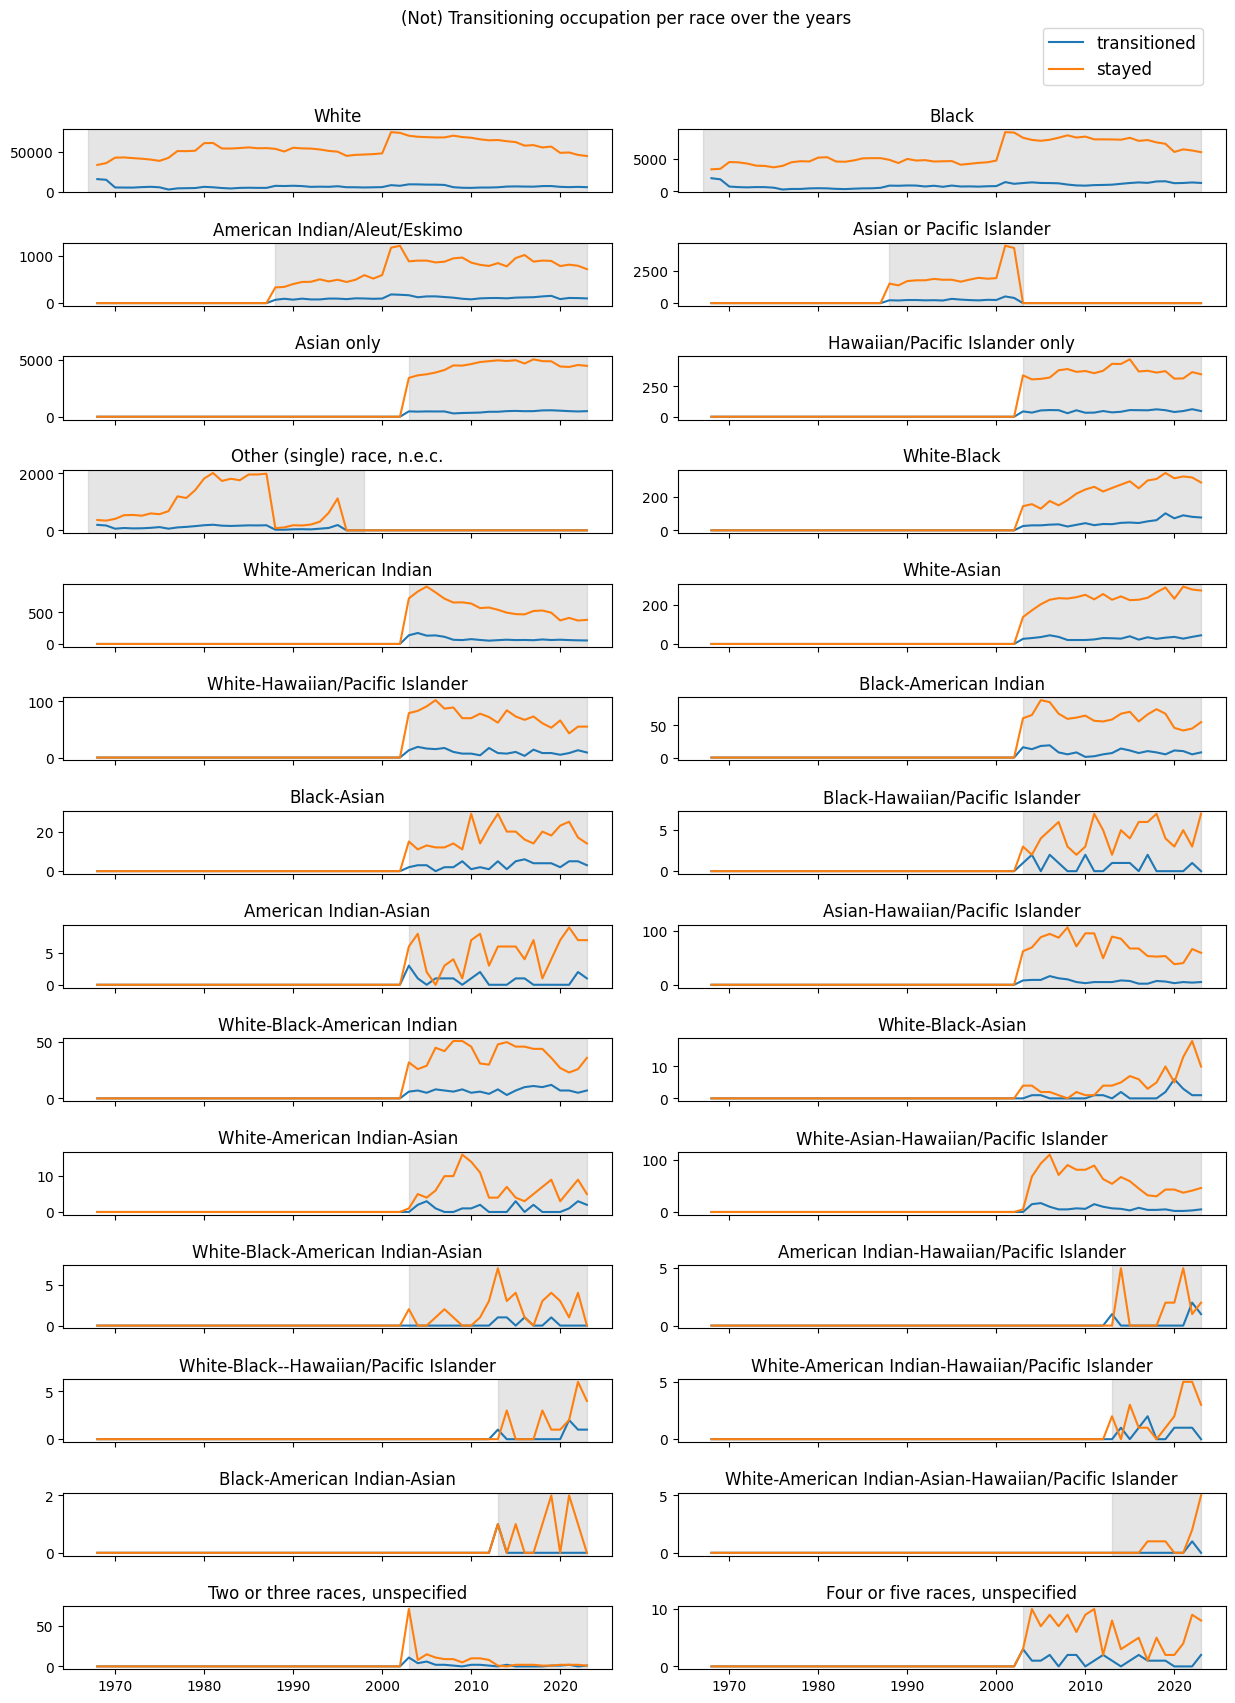

In [184]:
fig, axs = plt.subplots(14, 2, figsize=(15, 20), sharex = True)

axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

# Loop through unique race codes
sorted_race_codes = np.sort(melted_df_diff['RACE'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    current_race = (race_codes_df['RACE'] == race_code)
    ax.set_title(race_codes_df[current_race]['race_title'].item())

    race_data_diff = melted_df_diff[melted_df_diff['RACE'] == race_code]
    ax.plot(race_data_diff['YEAR'], race_data_diff['value'], label = 'transitioned')

    race_data_same = melted_df_same[melted_df_same['RACE'] == race_code]
    ax.plot(race_data_same['YEAR'], race_data_same['value'], label = 'stayed')

    ax.axvspan(race_codes_df[current_race]['start'].item(), race_codes_df[current_race]['end'].item(), color="grey", alpha=0.2)

fig.suptitle('(Not) Transitioning occupation per race over the years', y=0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

In [185]:
def compare_race_transitions(race_title: str = None, code: int = None):
    if race_title != None and code == None:
        race_code = race_codes_df[race_codes_df['race_title'] == race_title]['RACE'].item()
    else:
        race_code = code

    same = melted_df_same[melted_df_same['RACE'] == race_code]
    diff = melted_df_diff[melted_df_diff['RACE'] == race_code]
    comp = same.merge(diff, on = 'YEAR')
    comp.drop(['RACE_y', 'RACE_x'], axis=1, inplace = True)
    comp.rename(columns = {'value_x': 'stayed_count', 'value_y': 'transitioned_count'}, inplace = True)

    print(race_code, race_title)
    display(comp)

In [186]:
compare_race_transitions("White-American Indian-Asian-Hawaiian/Pacific Islander")

819 White-American Indian-Asian-Hawaiian/Pacific Islander


YEAR  stayed_count  transitioned_count
0   1968             0                   0
1   1969             0                   0
2   1970             0                   0
3   1971             0                   0
4   1972             0                   0
5   1973             0                   0
6   1974             0                   0
7   1975             0                   0
8   1976             0                   0
9   1977             0                   0
10  1978             0                   0
11  1979             0                   0
12  1980             0                   0
13  1981             0                   0
14  1982             0                   0
15  1983             0                   0
16  1984             0                   0
17  1985             0                   0
18  1986             0                   0
19  1987             0                   0
20  1988             0                   0
21  1989             0                   0
22  1990             0                   0
23  1991             0                   0
24  1992             0                   0
25  1993             0                   0
26  1994             0                   0
27  1995             0                   0
28  1996             0                   0
29  1997             0                   0
30  1998             0                   0
31  1999             0                   0
32  2000             0                   0
33  2001             0                   0
34  2002             0                   0
35  2003             0                   0
36  2004             0                   0
37  2005             0                   0
38  2006             0                   0
39  2007             0                   0
40  2008             0                   0
41  2009             0                   0
42  2010             0                   0
43  2011             0                   0
44  2012             0                   0
45  2013             0                   0
46  2014             0                   0
47  2015             0                   0
48  2016             0                   0
49  2017             1                   0
50  2018             1                   0
51  2019             1                   0
52  2020             0                   0
53  2021             0                   0
54  2022             2                   1
55  2023             5                   0

### Weighed comparison of occupation & occupation category transitions per race

In [198]:
all_combinations = pd.DataFrame(list(product(race_occ_df['RACE'].unique(), range(1967, 2024))), columns=['RACE', 'YEAR'])

In [199]:
# kept previous job
summed_df_same = same_occly.groupby(['YEAR', 'RACE'])['ASECWT'].sum().reset_index()
summed_df_same.rename({'ASECWT': 'stayed_weighed'}, axis=1, inplace = True)

# changed job in previous year
summed_df_diff = diff_occly.groupby(['YEAR', 'RACE'])['ASECWT'].sum().reset_index()
summed_df_diff.rename({'ASECWT': 'transitioned_weighed'}, axis=1, inplace = True)

trans_vs_stayed = all_combinations.merge(summed_df_diff, on = ['YEAR', 'RACE'], how = 'left')
trans_vs_stayed = trans_vs_stayed.merge(summed_df_same, on = ['YEAR', 'RACE'], how = 'left')

In [200]:
# of those who changed jobs, how many stayed in same category?
# ! Not all races stay in the same category, e.g. 816
same_category = diff_occly[diff_occly['occ_category'] == diff_occly['occ_category_LY']]
same_category = same_category.groupby(['YEAR', 'RACE'])['ASECWT'].sum().reset_index()
same_category.rename({'ASECWT': 'same_occ_category'}, axis = 1, inplace = True)

# of those who changed jobs, how many switched category?
# ! Not all races switch to a different category
diff_category = diff_occly[diff_occly['occ_category'] != diff_occly['occ_category_LY']]
diff_category = diff_category.groupby(['YEAR', 'RACE'])['ASECWT'].sum().reset_index()
diff_category.rename({'ASECWT': 'diff_occ_category'}, axis = 1, inplace = True)

trans_vs_stayed = trans_vs_stayed.merge(same_category, on = ['YEAR', 'RACE'], how = 'left')
trans_vs_stayed = trans_vs_stayed.merge(diff_category, on = ['YEAR', 'RACE'], how='left')

NaN values represent that no person identifying as a specific race in that year switched to a different occupation category or stayed in the same category. Hence, those values can be replaced with 0.

In [201]:
trans_vs_stayed.isnull().sum()

RACE                       0
YEAR                       0
transitioned_weighed    1086
stayed_weighed          1003
same_occ_category       1133
diff_occ_category       1119
dtype: int64

In [202]:
trans_vs_stayed.fillna(0, inplace=True)

In [203]:
trans_vs_stayed['RACE'].unique()

array([100, 200, 650, 802, 300, 804, 700, 651, 803, 652, 805, 808, 801,
       813, 810, 809, 830, 820, 811, 807, 817, 815, 806, 814, 818, 816,
       812, 819], dtype=int64)

Asian or Pacific Islander only has data up until 2002. To make plotting a comparison possible, fill the rest of the years with 0

In [204]:
# 650 = Asian or Pacific Islander
trans_vs_stayed[trans_vs_stayed['RACE'] == 650]['YEAR']

114    1967
115    1968
116    1969
117    1970
118    1971
119    1972
120    1973
121    1974
122    1975
123    1976
124    1977
125    1978
126    1979
127    1980
128    1981
129    1982
130    1983
131    1984
132    1985
133    1986
134    1987
135    1988
136    1989
137    1990
138    1991
139    1992
140    1993
141    1994
142    1995
143    1996
144    1997
145    1998
146    1999
147    2000
148    2001
149    2002
150    2003
151    2004
152    2005
153    2006
154    2007
155    2008
156    2009
157    2010
158    2011
159    2012
160    2013
161    2014
162    2015
163    2016
164    2017
165    2018
166    2019
167    2020
168    2021
169    2022
170    2023
Name: YEAR, dtype: int64

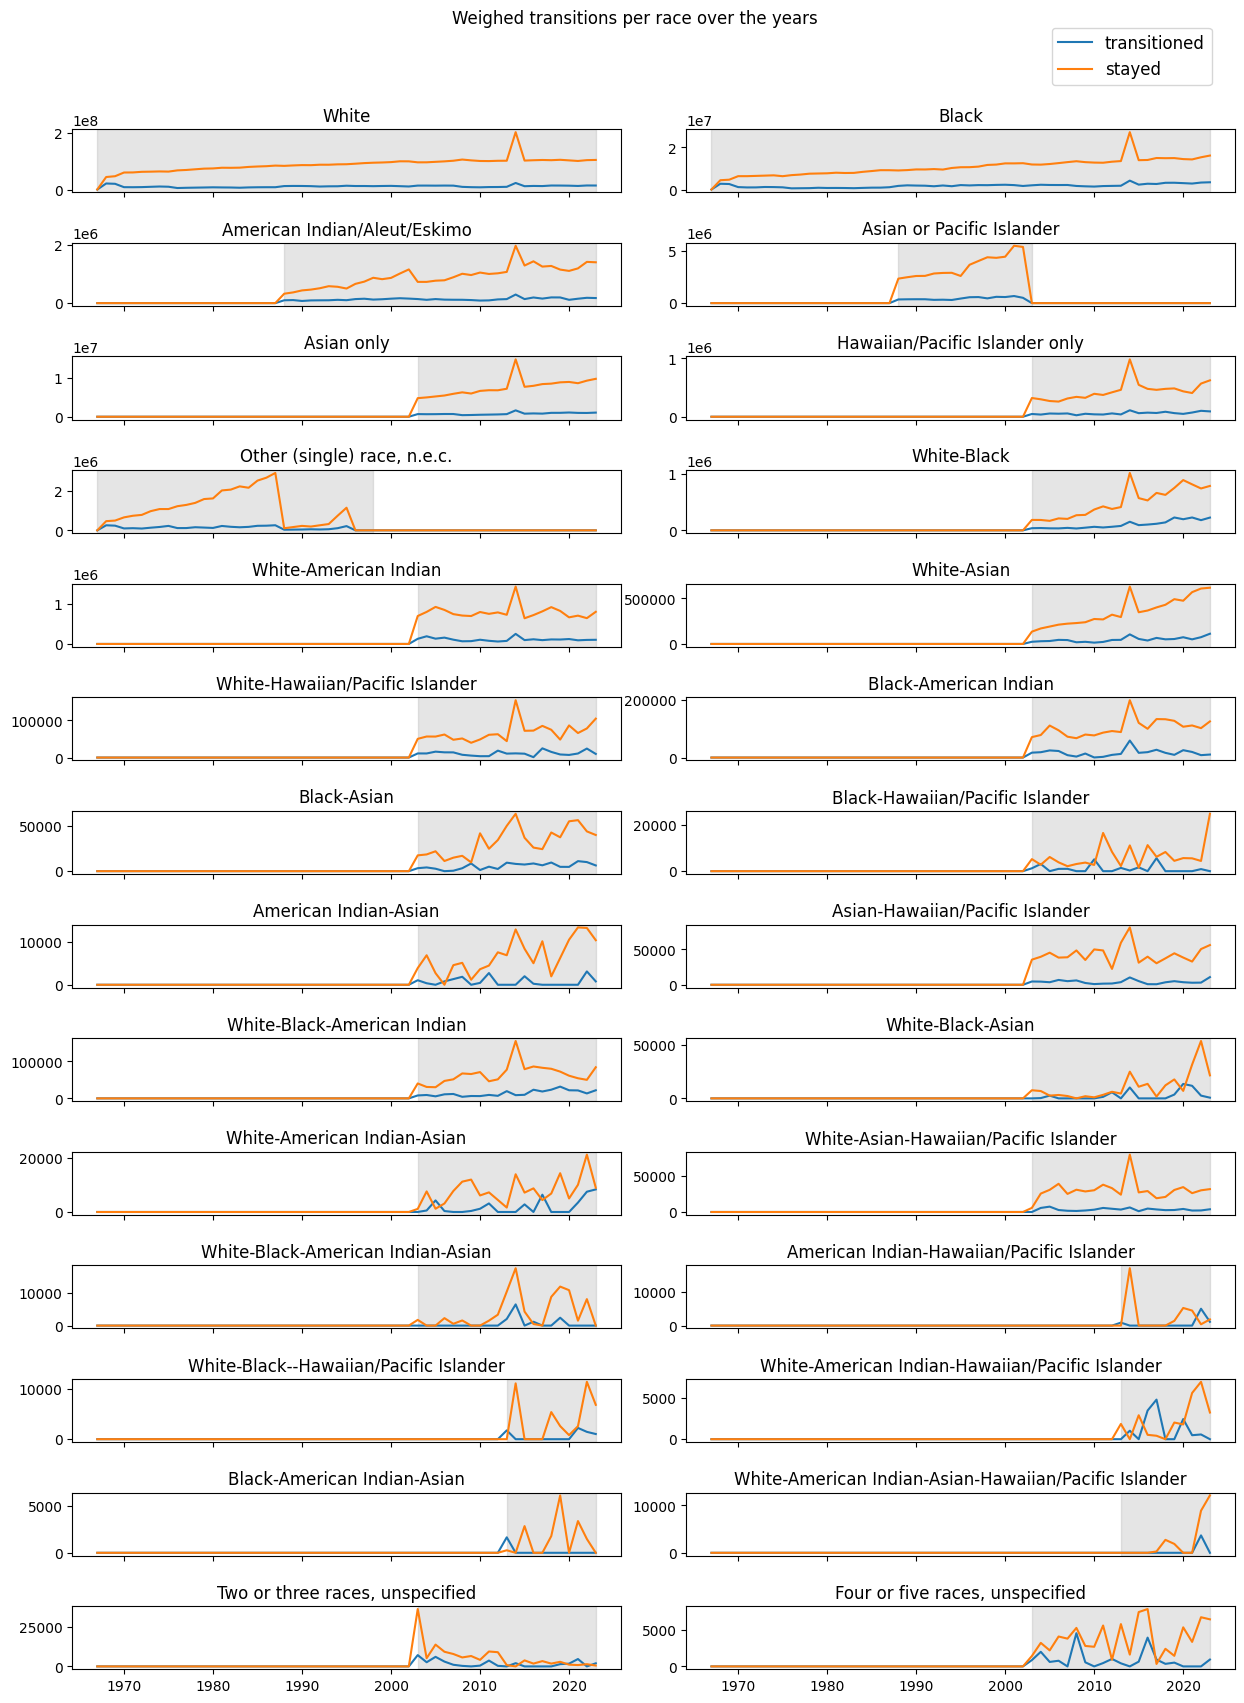

In [206]:
fig, axs = plt.subplots(14, 2, figsize=(15, 20), sharex = True)

axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

# Loop through unique race codes
sorted_race_codes = np.sort(trans_vs_stayed['RACE'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    current_race = (race_codes_df['RACE'] == race_code)
    ax.set_title(race_codes_df[current_race]['race_title'].item())

    race_data = trans_vs_stayed[trans_vs_stayed['RACE'] == race_code]
    ax.plot(race_data['YEAR'], race_data['transitioned_weighed'], label = 'transitioned')
    ax.plot(race_data['YEAR'], race_data['stayed_weighed'], label = 'stayed')

    ax.axvspan(race_codes_df[current_race]['start'].item(), race_codes_df[current_race]['end'].item(), color="grey", alpha=0.2)

fig.suptitle('Weighed transitions per race over the years', y=0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

Of those who switched their job in the previous year, how many stayed in the same/transitioned to a different occupation category?

threshold, to not include all race categories
categorize race codes (two or more categories includes more races)

In [210]:
race_codes_df

RACE                                         race_title  start   end
0    100                                              White   1967  2023
1    200                                              Black   1967  2023
2    300                       American Indian/Aleut/Eskimo   1988  2023
3    650                          Asian or Pacific Islander   1988  2003
4    651                                         Asian only   2003  2023
5    652                     Hawaiian/Pacific Islander only   2003  2023
6    700                        Other (single) race, n.e.c.   1967  1998
7    800                                  Two or more races   2003  2023
8    801                                        White-Black   2003  2023
9    802                              White-American Indian   2003  2023
10   803                                        White-Asian   2003  2023
11   804                    White-Hawaiian/Pacific Islander   2003  2023
12   805                              Black-American Indian   2003  2023
13   806                                        Black-Asian   2003  2023
14   807                    Black-Hawaiian/Pacific Islander   2003  2023
15   808                              American Indian-Asian   2003  2023
16   809                    Asian-Hawaiian/Pacific Islander   2003  2023
17   810                        White-Black-American Indian   2003  2023
18   811                                  White-Black-Asian   2003  2023
19   812                        White-American Indian-Asian   2003  2023
20   813              White-Asian-Hawaiian/Pacific Islander   2003  2023
21   814                  White-Black-American Indian-Asian   2003  2023
22   815          American Indian-Hawaiian/Pacific Islander   2013  2023
23   816             White-Black--Hawaiian/Pacific Islander   2013  2023
24   817    White-American Indian-Hawaiian/Pacific Islander   2013  2023
25   818                        Black-American Indian-Asian   2013  2023
26   819  White-American Indian-Asian-Hawaiian/Pacific I...   2013  2023
27   820                    Two or three races, unspecified   2003  2023
28   830                    Four or five races, unspecified   2003  2023
29   999                                              Blank   1967  2023

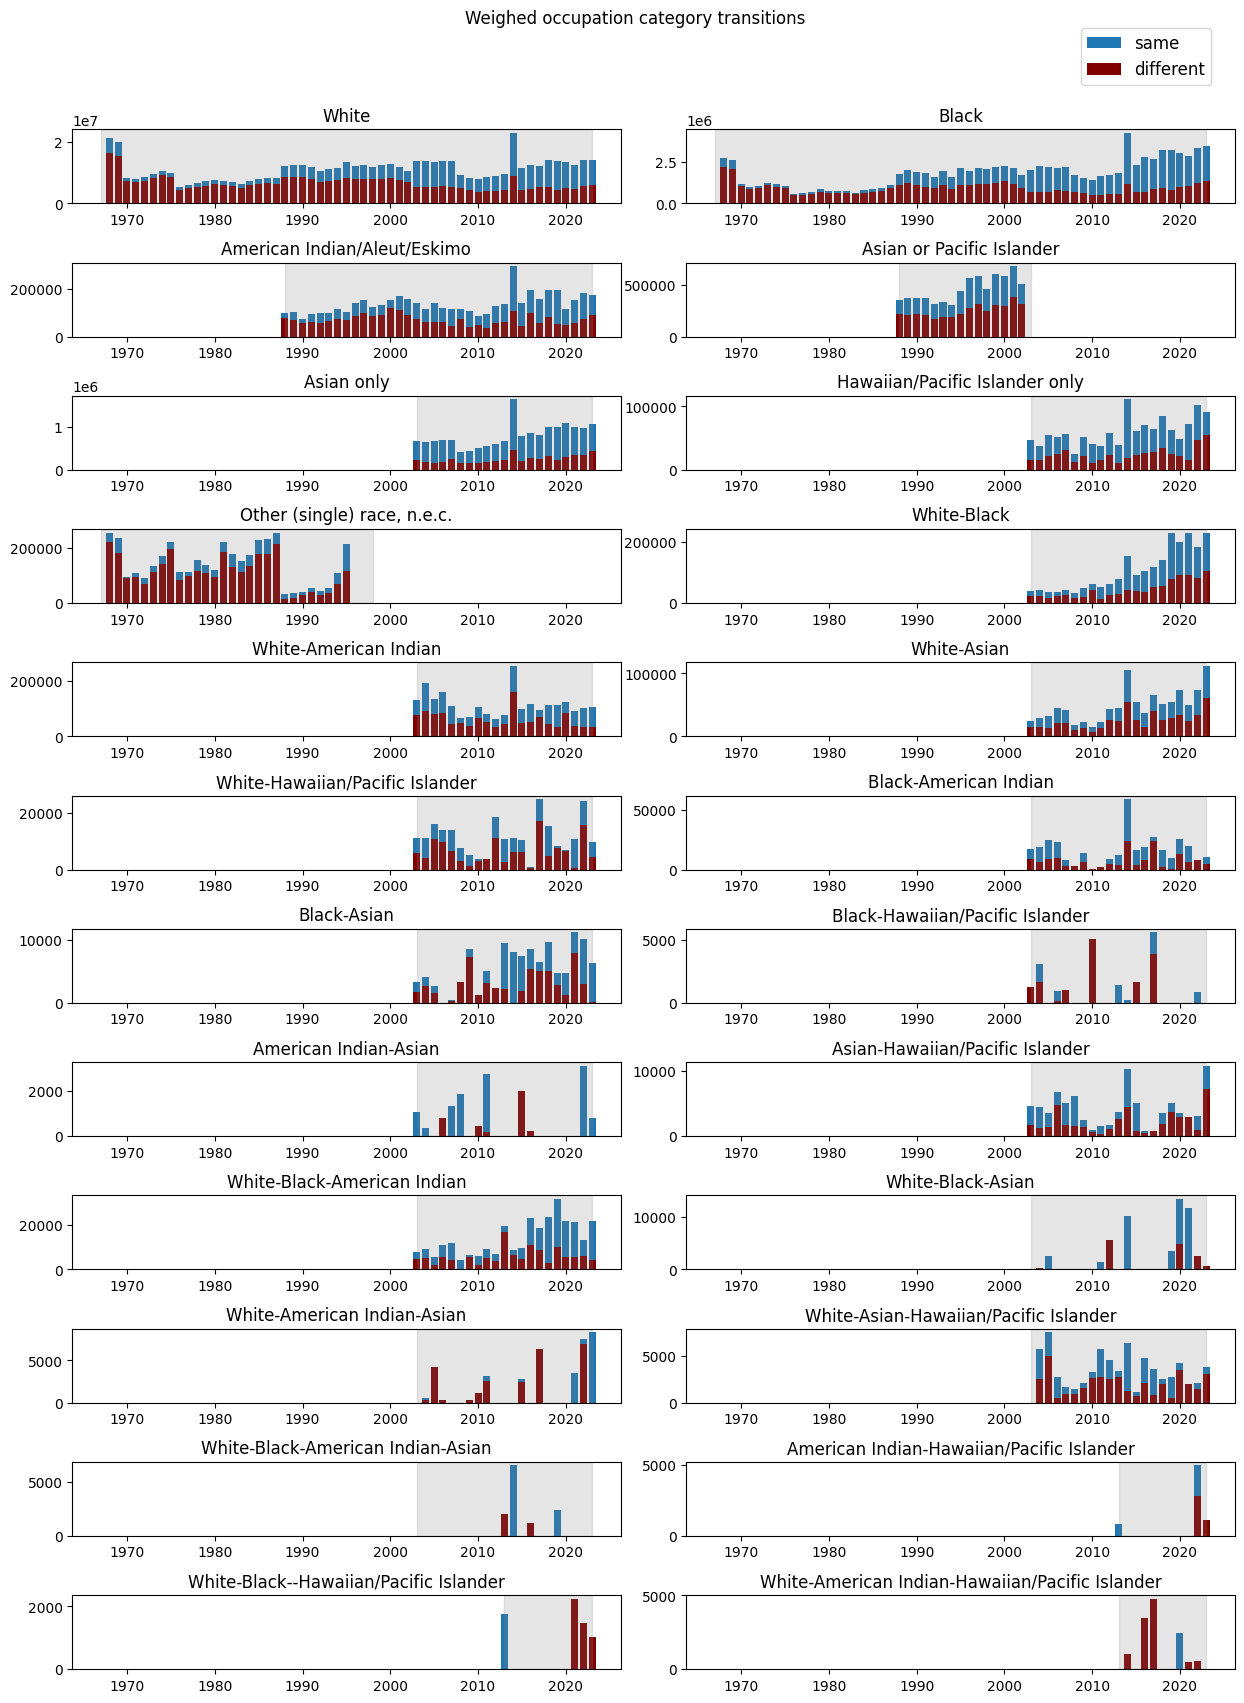

In [211]:
width = 0.35  # the width of the bars

fig, axs = plt.subplots(12, 2,  figsize=(15, 20))
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.8, wspace=0.12)

sorted_race_codes = np.sort(trans_vs_stayed['RACE'].unique())
for race_code, ax in zip(sorted_race_codes, axs):
    df = trans_vs_stayed[trans_vs_stayed['RACE'] == race_code]

    current_race = (race_codes_df['RACE'] == race_code)
    ax.set_title(race_codes_df[current_race]['race_title'].item())

    ax.bar(df['YEAR'], df["same_occ_category"]+df["diff_occ_category"], label='same') 
    ax.bar(df["YEAR"], df["diff_occ_category"], color="maroon", label='different') 

    ax.axvspan(race_codes_df[current_race]['start'].item(), race_codes_df[current_race]['end'].item(), color="grey", alpha=0.2)

fig.suptitle('Weighed occupation category transitions', y = 0.94)
fig.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1], loc =  'upper right', fontsize = 12, bbox_to_anchor=(0.89, 0.935))

plt.show()

In [212]:
race_occ_df.loc[(race_occ_df['occ_category'] != race_occ_df['occ_category_LY']) & 
                (race_occ_df['RACE'] == 816) &
                (race_occ_df['occ_code'] != race_occ_df['OCCLY'])]

YEAR  RACE   ASECWT  occ_code                      occ_category  \
216594   2022   816  1457.47    2540.0  EDUCATION, TRAINING, AND LIBRARY   
851870   2021   816   602.80    4760.0                 SALES AND RELATED   
1457906  2021   816  1637.00    4840.0                 SALES AND RELATED   
2646158  2023   816  1028.13    2300.0  EDUCATION, TRAINING, AND LIBRARY   

          OCCLY                          occ_category_LY  
216594    430.0  MANAGEMENT, BUSINESS, SCIENCE, AND ARTS  
851870   9130.0       TRANSPORTATION AND MATERIAL MOVING  
1457906  5100.0        OFFICE AND ADMINISTRATIVE SUPPORT  
2646158  5400.0        OFFICE AND ADMINISTRATIVE SUPPORT

In [213]:
race_occ_df.loc[(race_occ_df['RACE']==816) & (race_occ_df['YEAR'] == 2021)]

YEAR  RACE  ASECWT  occ_code                       occ_category  \
630471   2021   816  2018.0    8740.0                         PRODUCTION   
851870   2021   816   602.8    4760.0                  SALES AND RELATED   
1457906  2021   816  1637.0    4840.0                  SALES AND RELATED   
2644625  2021   816   567.2    5400.0  OFFICE AND ADMINISTRATIVE SUPPORT   

          OCCLY                     occ_category_LY  
630471   8740.0                          PRODUCTION  
851870   9130.0  TRANSPORTATION AND MATERIAL MOVING  
1457906  5100.0   OFFICE AND ADMINISTRATIVE SUPPORT  
2644625  5400.0   OFFICE AND ADMINISTRATIVE SUPPORT

### Other

In [214]:
race_occ_df[race_occ_df['RACE'] == 300]

YEAR  RACE   ASECWT  occ_code  \
52       1999   300  2540.83    5120.0   
1181     1988   300  1844.89    2910.0   
1359     1991   300  1361.65    2910.0   
1414     1992   300   888.86    2910.0   
1425     1992   300   435.02    2910.0   
...       ...   ...      ...       ...   
4051292  2015   300   305.60    4720.0   
4051360  2006   300  1124.95    1930.0   
4051467  2014   300  1485.65    1930.0   
4051509  2018   300   315.90    1930.0   
4051522  2019   300   381.30    1930.0   

                                           occ_category   OCCLY  \
52                    OFFICE AND ADMINISTRATIVE SUPPORT  2910.0   
1181     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  2910.0   
1359     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  2910.0   
1414     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  2910.0   
1425     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  2910.0   
...                                                 ...     ...   
4051292                               SALES AND RELATED  1930.0   
4051360              LIFE, PHYSICAL, AND SOCIAL SCIENCE  1930.0   
4051467              LIFE, PHYSICAL, AND SOCIAL SCIENCE  1930.0   
4051509              LIFE, PHYSICAL, AND SOCIAL SCIENCE  1930.0   
4051522              LIFE, PHYSICAL, AND SOCIAL SCIENCE  1930.0   

                                        occ_category_LY  
52       ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
1181     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
1359     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
1414     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
1425     ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
...                                                 ...  
4051292              LIFE, PHYSICAL, AND SOCIAL SCIENCE  
4051360              LIFE, PHYSICAL, AND SOCIAL SCIENCE  
4051467              LIFE, PHYSICAL, AND SOCIAL SCIENCE  
4051509              LIFE, PHYSICAL, AND SOCIAL SCIENCE  
4051522              LIFE, PHYSICAL, AND SOCIAL SCIENCE  

[30776 rows x 7 columns]